# 서울시 코로나 발생현황

- 서울 열린데이터 광장(https://data.seoul.go.kr/index.do )에서 OpenAPI 발급
- 사용안내를 참고하여 데이터 수집, csv 다운로드 받기
- 로그인 -> 나의 화면 -> 인증키관리 복사

## 1. 데이터 수집

### 1.1 필요한 모듈 import

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2. openAPI 접속 test

In [59]:
url = 'http://openapi.seoul.go.kr:8088/69544b7363646264343554504f7867/json/Corona19Status/1/1000/'
res = requests.get(url)
res.status_code
res.text

data = res.json()
data['Corona19Status']['row']

df = pd.DataFrame(data['Corona19Status']['row'])
df

,CORONA19_ID,CORONA19_DATE,CORONA19_NO,CORONA19_COUNTRY,CORONA19_PERSONAL,CORONA19_AREA,CORONA19_TRAVEL_HISTORY,CORONA19_CONTACT_HISTORY,CORONA19_CORRECTIVE,CORONA19_LEAVE_STATUS,CORONA19_MOVING_PATH,CORONA19_IDATE,CORONA19_MDATE
0,97655,2021-09-26,,,,성북구,,기타 확진자 접촉,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
1,97654,2021-09-26,,,,강북구,,기타 확진자 접촉,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
2,97653,2021-09-26,,,,영등포구,,감염경로 조사중,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
3,97652,2021-09-26,,,,광진구,,감염경로 조사중,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
4,97651,2021-09-26,,,,타시도,,타시도 확진자 접촉,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,96660,2021-09-25,,,,종로구,,감염경로 조사중,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
996,96659,2021-09-25,,,,서초구,,기타 확진자 접촉,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
997,96658,2021-09-25,,,,송파구,,기타 확진자 접촉,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
998,96657,2021-09-25,,,,종로구,,감염경로 조사중,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46


In [60]:
df = pd.DataFrame()
for i in range(1, 98000, 1000):
    url = 'http://openapi.seoul.go.kr:8088/69544b7363646264343554504f7867/json/Corona19Status/{}/{}/'.format(i,i+999)
    res = requests.get(url)
    #res.status_code
    data = res.json()
    df = df.append(data['Corona19Status']['row'], ignore_index=True)

df

,CORONA19_ID,CORONA19_DATE,CORONA19_NO,CORONA19_COUNTRY,CORONA19_PERSONAL,CORONA19_AREA,CORONA19_TRAVEL_HISTORY,CORONA19_CONTACT_HISTORY,CORONA19_CORRECTIVE,CORONA19_LEAVE_STATUS,CORONA19_MOVING_PATH,CORONA19_IDATE,CORONA19_MDATE
0,97655,2021-09-26,,,,성북구,,기타 확진자 접촉,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
1,97654,2021-09-26,,,,강북구,,기타 확진자 접촉,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
2,97653,2021-09-26,,,,영등포구,,감염경로 조사중,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
3,97652,2021-09-26,,,,광진구,,감염경로 조사중,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
4,97651,2021-09-26,,,,타시도,,타시도 확진자 접촉,,-,,2021-09-27 10:50:46,2021-09-27 10:50:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97650,5,2020-01-31,,,,성북구,,기타 확진자 접촉,,퇴원,,2021-05-27 11:08:12,2021-05-27 11:08:12
97651,4,2020-01-30,,,,마포구,중국,해외유입,,퇴원,,2021-05-27 11:08:12,2021-05-27 11:08:12
97652,3,2020-01-30,,,,종로구,,종로구 집단발병,,퇴원,,2021-05-27 11:08:12,2021-05-27 11:08:12
97653,2,2020-01-30,,,,중랑구,중국,해외유입,,퇴원,,2021-05-27 11:08:12,2021-05-27 11:08:12


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96877 entries, 0 to 96876
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CORONA19_ID               96877 non-null  object
 1   CORONA19_DATE             96877 non-null  object
 2   CORONA19_NO               96877 non-null  object
 3   CORONA19_COUNTRY          96877 non-null  object
 4   CORONA19_PERSONAL         96877 non-null  object
 5   CORONA19_AREA             96877 non-null  object
 6   CORONA19_TRAVEL_HISTORY   96877 non-null  object
 7   CORONA19_CONTACT_HISTORY  96877 non-null  object
 8   CORONA19_CORRECTIVE       96877 non-null  object
 9   CORONA19_LEAVE_STATUS     96877 non-null  object
 10  CORONA19_MOVING_PATH      96877 non-null  object
 11  CORONA19_IDATE            96877 non-null  object
 12  CORONA19_MDATE            96877 non-null  object
dtypes: object(13)
memory usage: 9.6+ MB


In [62]:
df.to_csv('data5/covid_seoul.csv', index=False)

In [19]:
# 내가 한거
for i in range(1,10000,1000) :
    url = 'http://openapi.seoul.go.kr:8088/69544b7363646264343554504f7867/json/Corona19Status/{}/{}/'.format(i,i+999)
    res = requests.get(url)
    res.status_code

    data = res.json()
    data['Corona19Status']['row']

    df = pd.merge(df,pd.DataFrame(data['Corona19Status']['row']),how='outer')
df

,CORONA19_ID,CORONA19_DATE,CORONA19_NO,CORONA19_COUNTRY,CORONA19_PERSONAL,CORONA19_AREA,CORONA19_TRAVEL_HISTORY,CORONA19_CONTACT_HISTORY,CORONA19_CORRECTIVE,CORONA19_LEAVE_STATUS,CORONA19_MOVING_PATH,CORONA19_IDATE,CORONA19_MDATE
0,96877,2021-09-25,,,,강서구,,감염경로 조사중,,사망,,2021-09-26 09:24:30,2021-09-26 11:06:57
1,96876,2021-09-25,,,,강서구,미국,해외유입,,-,,2021-09-26 09:24:30,2021-09-26 09:24:30
2,96875,2021-09-25,,,,강남구,,감염경로 조사중,,-,,2021-09-26 09:24:30,2021-09-26 09:24:30
3,96874,2021-09-25,,,,서초구,,송파구 소재 시장 관련(\'21.9.),,-,,2021-09-26 09:24:30,2021-09-26 09:24:30
4,96873,2021-09-25,,,,타시도,,감염경로 조사중,,-,,2021-09-26 09:24:30,2021-09-26 09:24:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,1882,2020-08-15,,,,은평구,,성북구 사랑제일교회 관련,,퇴원,,2021-05-27 11:08:16,2021-05-27 11:08:16
94996,1881,2020-08-15,,,,은평구,,성북구 사랑제일교회 관련,,퇴원,,2021-05-27 11:08:16,2021-05-27 11:08:16
94997,1880,2020-08-15,,,,은평구,,성북구 사랑제일교회 관련,,퇴원,,2021-05-27 11:08:16,2021-05-27 11:08:16
94998,1879,2020-08-15,,,,서초구,,성북구 사랑제일교회 관련,,퇴원,,2021-05-27 11:08:16,2021-05-27 11:08:16


### 1.3. 전체 데이터 수집

In [2]:
df = pd.read_csv('data5/covid_seoul.csv')
df.tail()

C:\Users\ict06\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CORONA19_ID,CORONA19_DATE,CORONA19_NO,CORONA19_COUNTRY,CORONA19_PERSONAL,CORONA19_AREA,CORONA19_TRAVEL_HISTORY,CORONA19_CONTACT_HISTORY,CORONA19_CORRECTIVE,CORONA19_LEAVE_STATUS,CORONA19_MOVING_PATH,CORONA19_IDATE,CORONA19_MDATE
97650,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08:12,2021-05-27 11:08:12
97651,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08:12,2021-05-27 11:08:12
97652,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08:12,2021-05-27 11:08:12
97653,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08:12,2021-05-27 11:08:12
97654,1,2020-01-24,NaN,NaN,NaN,강서구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08:12,2021-05-27 11:08:12


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96877 entries, 0 to 96876
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CORONA19_ID               96877 non-null  int64  
 1   CORONA19_DATE             96877 non-null  object 
 2   CORONA19_NO               0 non-null      float64
 3   CORONA19_COUNTRY          0 non-null      float64
 4   CORONA19_PERSONAL         0 non-null      float64
 5   CORONA19_AREA             96877 non-null  object 
 6   CORONA19_TRAVEL_HISTORY   1704 non-null   object 
 7   CORONA19_CONTACT_HISTORY  96877 non-null  object 
 8   CORONA19_CORRECTIVE       0 non-null      float64
 9   CORONA19_LEAVE_STATUS     96877 non-null  object 
 10  CORONA19_MOVING_PATH      10000 non-null  object 
 11  CORONA19_IDATE            96877 non-null  object 
 12  CORONA19_MDATE            96877 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 9.6+ MB


## 2. 데이터 가공

### 2.1. 컬럼명에서 'CORONA19_' 삭제

In [6]:
df.columns = df.columns.str.replace('CORONA19_','')
df.tail()

,ID,DATE,AREA,TRAVEL_HISTORY,CONTACT_HISTORY,LEAVE_STATUS
97650,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
97651,4,2020-01-30,마포구,중국,해외유입,퇴원
97652,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
97653,2,2020-01-30,중랑구,중국,해외유입,퇴원
97654,1,2020-01-24,강서구,중국,해외유입,퇴원


### 2.2. 필요없는 컬럼 삭제

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               97655 non-null  int64 
 1   DATE             97655 non-null  object
 2   AREA             97655 non-null  object
 3   TRAVEL_HISTORY   1709 non-null   object
 4   CONTACT_HISTORY  97655 non-null  object
 5   LEAVE_STATUS     97655 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.5+ MB


In [7]:
df_temp = df.copy()

df_temp.drop(columns=['NO','COUNTRY'], inplace=True)
df_temp = df_temp.drop(columns=['NO','COUNTRY'])
df_temp.tail()

KeyError: "['NO' 'COUNTRY'] not found in axis"

In [5]:
columns = ['ID', 'DATE', 'AREA', 'TRAVEL_HISTORY','CONTACT_HISTORY', 'LEAVE_STATUS']
df = df[columns]
df.head()

,ID,DATE,AREA,TRAVEL_HISTORY,CONTACT_HISTORY,LEAVE_STATUS
0,97655,2021-09-26,성북구,NaN,기타 확진자 접촉,-
1,97654,2021-09-26,강북구,NaN,기타 확진자 접촉,-
2,97653,2021-09-26,영등포구,NaN,감염경로 조사중,-
3,97652,2021-09-26,광진구,NaN,감염경로 조사중,-
4,97651,2021-09-26,타시도,NaN,타시도 확진자 접촉,-


### 2.3. 컬럼명 재설정

In [42]:
df.columns

Index(['ID', 'DATE', 'AREA', 'TRAVEL_HISTORY', 'CONTACT_HISTORY',
       'LEAVE_STATUS'],
      dtype='object')

In [9]:
df.rename(columns={'ID':'연번', 
                   'DATE':'확진일', 
                   'AREA':'지역',
                   'TRAVEL_HISTORY':'여행력',
                   'CONTACT_HISTORY':'접촉력',
                   'LEAVE_STATUS':'상태'}, inplace=True)

df.head()

,연번,확진일,지역,여행력,접촉력,상태
0,97655,2021-09-26,성북구,NaN,기타 확진자 접촉,-
1,97654,2021-09-26,강북구,NaN,기타 확진자 접촉,-
2,97653,2021-09-26,영등포구,NaN,감염경로 조사중,-
3,97652,2021-09-26,광진구,NaN,감염경로 조사중,-
4,97651,2021-09-26,타시도,NaN,타시도 확진자 접촉,-


### 2.4. 데이터 타입변경

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96877 entries, 0 to 96876
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      96877 non-null  int64 
 1   확진일     96877 non-null  object
 2   지역      96877 non-null  object
 3   여행력     1704 non-null   object
 4   접촉력     96877 non-null  object
 5   상태      96877 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.4+ MB


In [45]:
df['확진일'].astype(datetime)

NameError: name 'datetime' is not defined

In [52]:
df['확진일'] = pd.to_datetime(df['확진일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      97655 non-null  int64         
 1   확진일     97655 non-null  datetime64[ns]
 2   지역      97655 non-null  object        
 3   여행력     1709 non-null   object        
 4   접촉력     97655 non-null  object        
 5   상태      97655 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.5+ MB


In [68]:
df['확진일'].dt.year

0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
97650    2020
97651    2020
97652    2020
97653    2020
97654    2020
Name: 확진일, Length: 97655, dtype: int64

In [69]:
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    95946
접촉력        0
상태         0
dtype: int64

### 2.5. index 재설정

In [51]:
temp = df.set_index('연번')
temp = temp.sort_index()
temp

,확진일,지역,여행력,접촉력,상태
연번,,,,,
1,2020-01-24,강서구,중국,해외유입,퇴원
2,2020-01-30,중랑구,중국,해외유입,퇴원
3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
4,2020-01-30,마포구,중국,해외유입,퇴원
5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
...,...,...,...,...,...
96873,2021-09-25,타시도,NaN,감염경로 조사중,-
96874,2021-09-25,서초구,NaN,송파구 소재 시장 관련(\'21.9.),-
96875,2021-09-25,강남구,NaN,감염경로 조사중,-


In [11]:
df = df.sort_index(ascending=False).reset_index(drop=True)
df

,연번,확진일,지역,여행력,접촉력,상태
0,1,2020-01-24,강서구,중국,해외유입,퇴원
1,2,2020-01-30,중랑구,중국,해외유입,퇴원
2,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
3,4,2020-01-30,마포구,중국,해외유입,퇴원
4,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...
97650,97651,2021-09-26,타시도,NaN,타시도 확진자 접촉,-
97651,97652,2021-09-26,광진구,NaN,감염경로 조사중,-
97652,97653,2021-09-26,영등포구,NaN,감염경로 조사중,-
97653,97654,2021-09-26,강북구,NaN,기타 확진자 접촉,-


In [71]:
df.to_csv('data5/covid_seoul_clean.csv', index=False)

In [50]:
df = pd.read_csv('data5/covid_seoul_clean.csv')

In [16]:
df['확진일'] = pd.to_datetime(df['확진일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97655 entries, 0 to 97654
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      97655 non-null  int64         
 1   확진일     97655 non-null  datetime64[ns]
 2   지역      97655 non-null  object        
 3   여행력     1709 non-null   object        
 4   접촉력     97655 non-null  object        
 5   상태      97655 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.5+ MB


## 3. 데이터 분석 및 시각화

- 시각화 기본설정

In [12]:
# 폰트설정
plt.rcParams['font.family']='Malgun Gothic'

# - 부호가 깨질때
plt.rcParams['axes.unicode_minus'] = False

# 캔버스 사이즈 설정
plt.rcParams["figure.figsize"] = (15, 5)

# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### 3.1.일별 확진자수 

In [73]:
df.tail(100)

,연번,확진일,지역,여행력,접촉력,상태
97555,97556,2021-09-26,은평구,NaN,기타 확진자 접촉,-
97556,97557,2021-09-26,은평구,NaN,타시도 확진자 접촉,-
97557,97558,2021-09-26,은평구,NaN,타시도 확진자 접촉,-
97558,97559,2021-09-26,용산구,NaN,감염경로 조사중,-
97559,97560,2021-09-26,노원구,NaN,기타 확진자 접촉,-
...,...,...,...,...,...,...
97650,97651,2021-09-26,타시도,NaN,타시도 확진자 접촉,-
97651,97652,2021-09-26,광진구,NaN,감염경로 조사중,-
97652,97653,2021-09-26,영등포구,NaN,감염경로 조사중,-
97653,97654,2021-09-26,강북구,NaN,기타 확진자 접촉,-


In [74]:
df['확진일'].value_counts()

2021-09-24    1222
2021-09-25     928
2021-09-23     906
2021-09-14     808
2021-09-26     778
              ... 
2020-04-30       1
2020-05-01       1
2020-04-24       1
2020-02-02       1
2020-05-17       1
Name: 확진일, Length: 580, dtype: int64

#### 3.1.1. 일별 확진자 현황

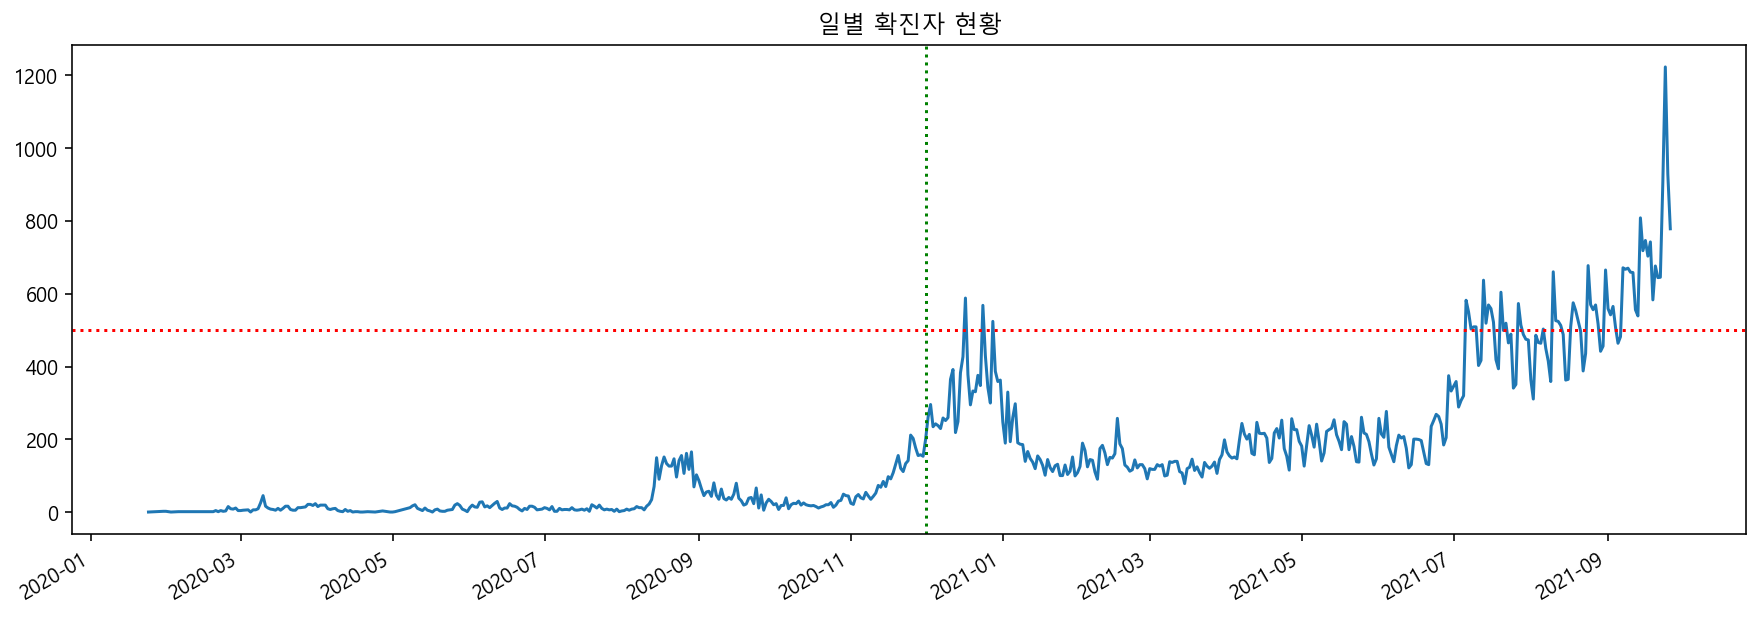

In [81]:
df['확진일'].value_counts().plot(figsize=(15,5), title='일별 확진자 현황')
plt.axvline('2020-12', color='green', linestyle=':') # 2020년과 2021년 나누기
plt.axhline(500, color='red', linestyle=':')

#### 3.1.2 일별 확진자, 완치자, 사망자 현황

In [82]:
df['상태'].value_counts()

퇴원    83538
-     13487
사망      629
42        1
Name: 상태, dtype: int64

- 사망자, 완치자 현황

In [83]:
p1 = pd.pivot_table(data=df,index='확진일', columns='상태',values='연번', aggfunc='count' )
p1

상태,-,42,사망,퇴원
확진일,,,,
2020-01-24,NaN,NaN,NaN,1.0
2020-01-30,NaN,NaN,NaN,3.0
2020-01-31,NaN,NaN,NaN,3.0
2020-02-02,NaN,NaN,NaN,1.0
2020-02-05,NaN,NaN,NaN,2.0
...,...,...,...,...
2021-09-22,644.0,NaN,1.0,NaN
2021-09-23,904.0,NaN,NaN,2.0
2021-09-24,1221.0,NaN,1.0,NaN


In [85]:
p1 = p1.drop(columns=['-','42'])
p1

상태,사망,퇴원
확진일,,
2020-01-24,NaN,1.0
2020-01-30,NaN,3.0
2020-01-31,NaN,3.0
2020-02-02,NaN,1.0
2020-02-05,NaN,2.0
...,...,...
2021-09-22,1.0,NaN
2021-09-23,NaN,2.0
2021-09-24,1.0,NaN


In [87]:
# Nan 값을 0으로 채우기
p1 = p1.fillna(0)
p1

상태,사망,퇴원
확진일,,
2020-01-24,0.0,1.0
2020-01-30,0.0,3.0
2020-01-31,0.0,3.0
2020-02-02,0.0,1.0
2020-02-05,0.0,2.0
...,...,...
2021-09-22,1.0,0.0
2021-09-23,0.0,2.0
2021-09-24,1.0,0.0


- 일별 확진자 현황

In [91]:
g1 = df.groupby('확진일')['연번'].count().to_frame()
g1

,연번
확진일,
2020-01-24,1
2020-01-30,3
2020-01-31,3
2020-02-02,1
2020-02-05,2
...,...
2021-09-22,645
2021-09-23,906
2021-09-24,1222


- 일별 확진자, 완치자, 사망자 현황

In [93]:
# p1, g1 합치기

df_day = pd.merge(g1,p1, how='left', on='확진일')
df_day

,연번,사망,퇴원
확진일,,,
2020-01-24,1,0.0,1.0
2020-01-30,3,0.0,3.0
2020-01-31,3,0.0,3.0
2020-02-02,1,0.0,1.0
2020-02-05,2,0.0,2.0
...,...,...,...
2021-09-22,645,1.0,0.0
2021-09-23,906,0.0,2.0
2021-09-24,1222,1.0,0.0


In [94]:
# 컬럼명 변경
df_day = df_day.rename(columns={'연번':'확진자','사망':'사망자','퇴원':'완치자'})
df_day

,확진자,사망자,완치자
확진일,,,
2020-01-24,1,0.0,1.0
2020-01-30,3,0.0,3.0
2020-01-31,3,0.0,3.0
2020-02-02,1,0.0,1.0
2020-02-05,2,0.0,2.0
...,...,...,...
2021-09-22,645,1.0,0.0
2021-09-23,906,0.0,2.0
2021-09-24,1222,1.0,0.0


In [95]:
# 사망자, 완치자 type 변경
df_day['사망자'] = df_day['사망자'].astype(int)
df_day['완치자'] = df_day['완치자'].astype(int)
df_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 580 entries, 2020-01-24 to 2021-09-26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   확진자     580 non-null    int64
 1   사망자     580 non-null    int32
 2   완치자     580 non-null    int32
dtypes: int32(2), int64(1)
memory usage: 29.8 KB


In [97]:
df_day

,확진자,사망자,완치자
확진일,,,
2020-01-24,1,0,1
2020-01-30,3,0,3
2020-01-31,3,0,3
2020-02-02,1,0,1
2020-02-05,2,0,2
...,...,...,...
2021-09-22,645,1,0
2021-09-23,906,0,2
2021-09-24,1222,1,0


<AxesSubplot:title={'center':'일별 확진자 상태 현황'}, xlabel='확진일'>

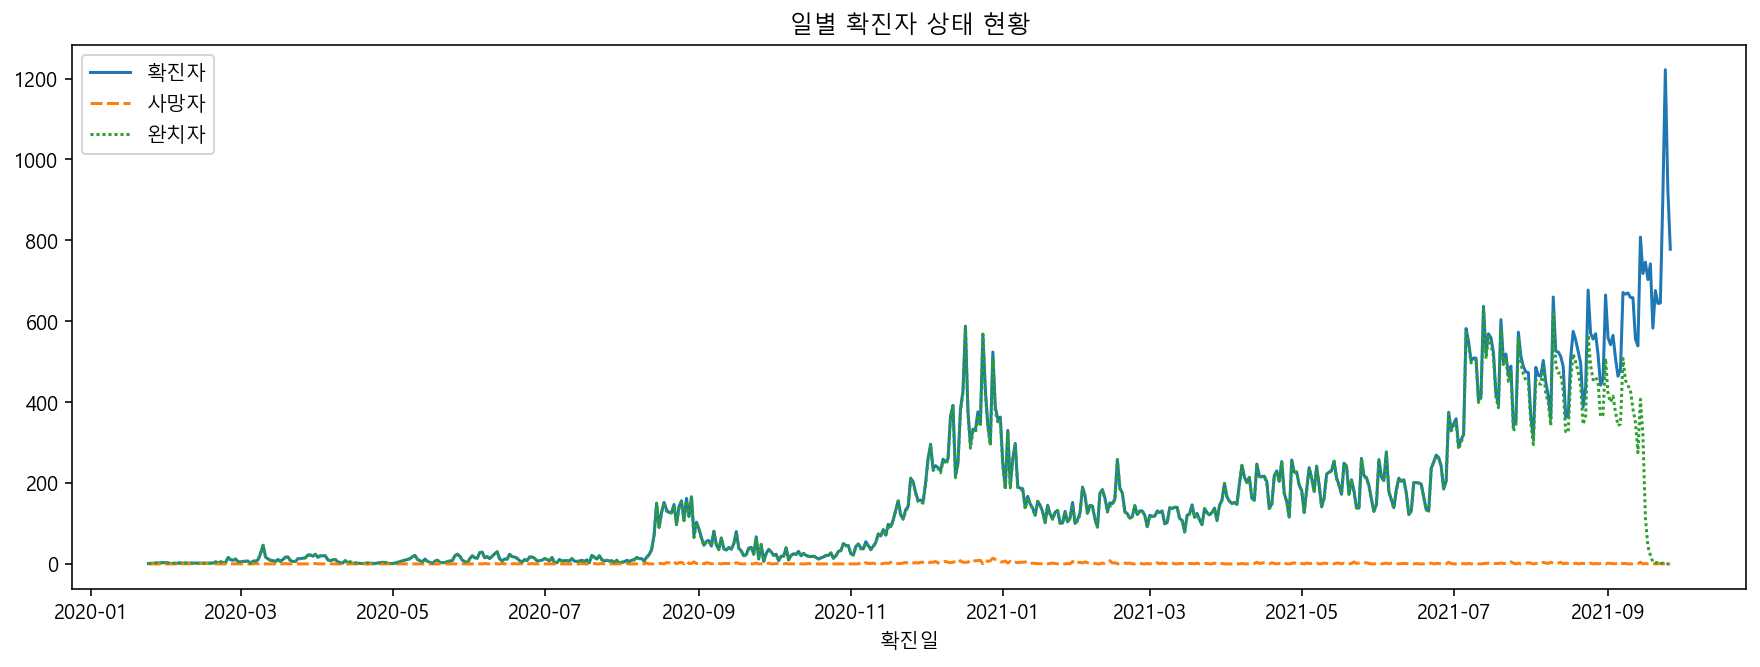

In [110]:
plt.title('일별 확진자 상태 현황')
sns.lineplot(data=df_day)

### 3.2.월별 확진자 현황

In [53]:
#df.head()

df['확진년도'] = df['확진일'].dt.year
df.head()


,연번,확진일,지역,여행력,접촉력,상태,확진년도
0,1,2020-01-24,강서구,중국,해외유입,퇴원,2020
1,2,2020-01-30,중랑구,중국,해외유입,퇴원,2020
2,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원,2020
3,4,2020-01-30,마포구,중국,해외유입,퇴원,2020
4,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원,2020


In [54]:
df['확진월'] = df['확진일'].dt.month
df.head()

,연번,확진일,지역,여행력,접촉력,상태,확진년도,확진월
0,1,2020-01-24,강서구,중국,해외유입,퇴원,2020,1
1,2,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1
2,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원,2020,1
3,4,2020-01-30,마포구,중국,해외유입,퇴원,2020,1
4,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원,2020,1


In [55]:
df.head()


,연번,확진일,지역,여행력,접촉력,상태,확진년도,확진월
0,1,2020-01-24,강서구,중국,해외유입,퇴원,2020,1
1,2,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1
2,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원,2020,1
3,4,2020-01-30,마포구,중국,해외유입,퇴원,2020,1
4,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원,2020,1


#### 3.2.1. 전년도 대비 월별 확진자 현황

<AxesSubplot:xlabel='확진월', ylabel='연번'>

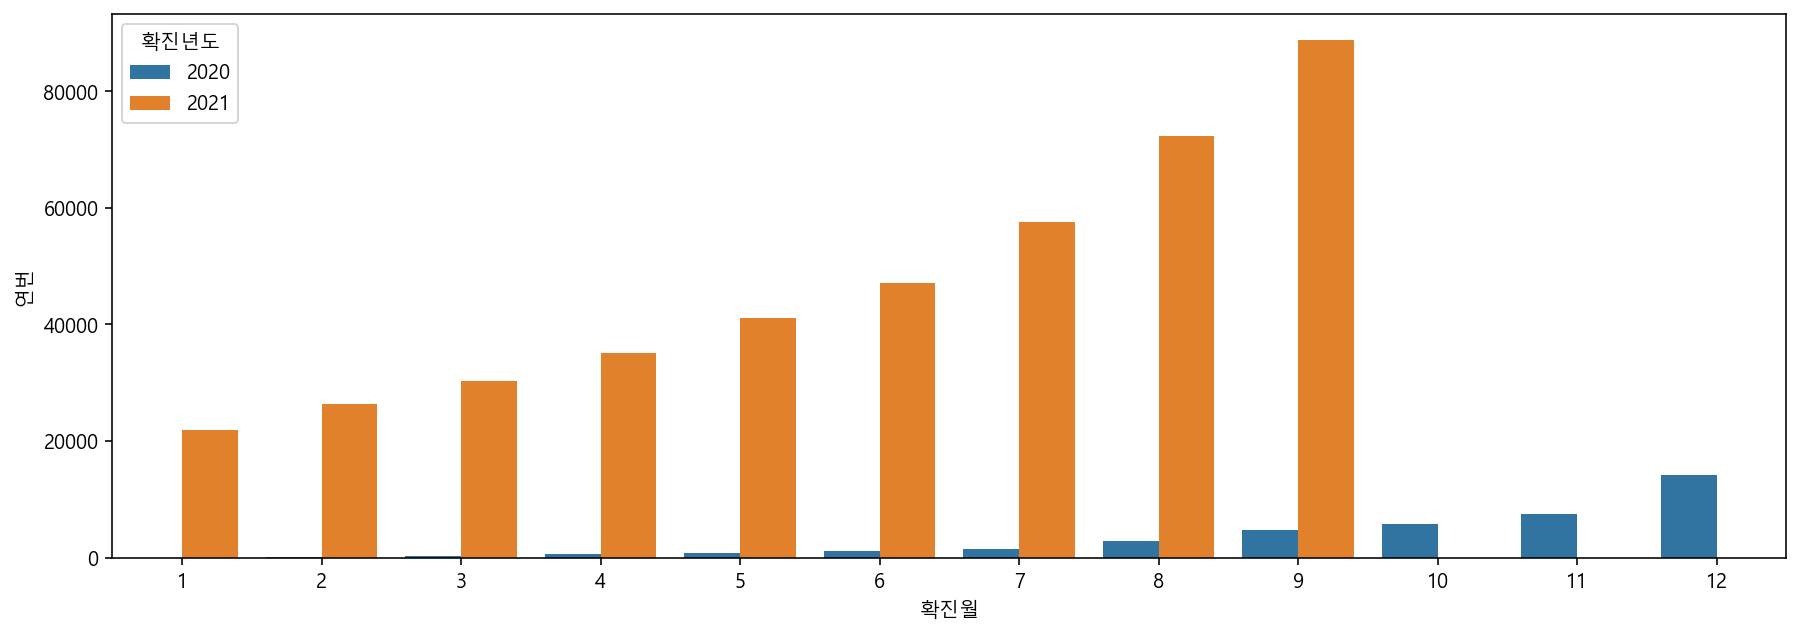

In [118]:
sns.barplot(data=df, x='확진월', y='연번', hue='확진년도', ci=None)

In [165]:
g1 = df.groupby(['확진월','확진년도'])['연번'].count().to_frame()
g1

연번
확진월 확진년도       
1   2020      7
    2021   4878
2   2020     80
    2021   4060
3   2020    391
    2021   3897
4   2020    156
    2021   5803
5   2020    229
    2021   6030
6   2020    459
    2021   6258
7   2020    281
    2021  14504
8   2020   2415
    2021  15193
9   2020   1306
    2021  17639
10  2020    733
11  2020   2904
12  2020  10432

In [166]:
g1 = g1.reset_index()
g1 = g1.rename(columns={'연번':'확진자'})
g1

,확진월,확진년도,확진자
0,1,2020,7
1,1,2021,4878
2,2,2020,80
3,2,2021,4060
4,3,2020,391
5,3,2021,3897
6,4,2020,156
7,4,2021,5803
8,5,2020,229
9,5,2021,6030


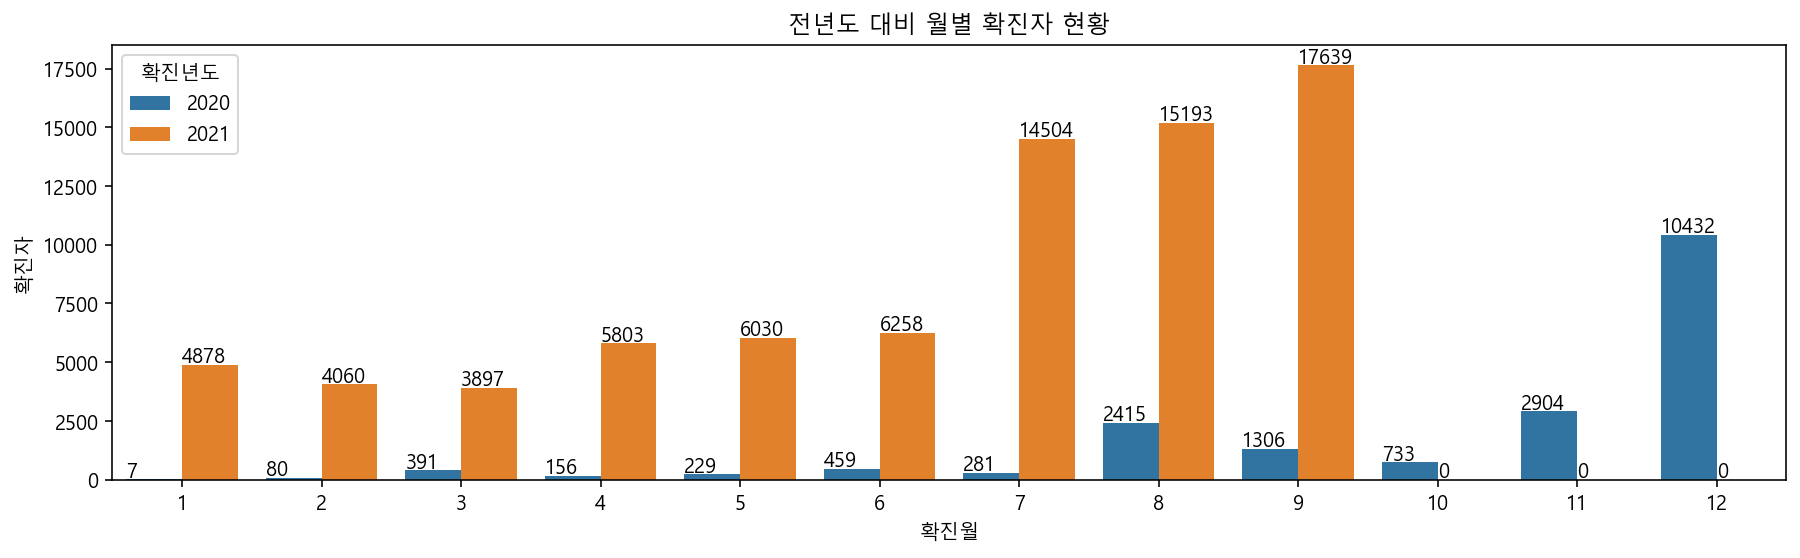

In [168]:
plt.figure(figsize=(15,4))
plt.title('전년도 대비 월별 확진자 현황')
graph = sns.barplot(data=g1, x='확진월', y='확진자',hue='확진년도',order=p.index, ci=None)

idx_no = 0
for i, val in p.iterrows():
    #print(i,val[2020], val[2021])
    graph.text(x=idx_no-0.4, y=val[2020]+100.0, s=val[2020])
    graph.text(x=idx_no, y=val[2021]+100.0, s=val[2021])
    idx_no +=1
    
    

#### 3.2.2. countplot을 이용한 시각화
- 범주형 변수의 빈도수를 시각화

In [136]:
df.tail(100
       )

,연번,확진일,지역,여행력,접촉력,상태,확진년도,확진월
97555,97556,2021-09-26,은평구,NaN,기타 확진자 접촉,-,2021,9
97556,97557,2021-09-26,은평구,NaN,타시도 확진자 접촉,-,2021,9
97557,97558,2021-09-26,은평구,NaN,타시도 확진자 접촉,-,2021,9
97558,97559,2021-09-26,용산구,NaN,감염경로 조사중,-,2021,9
97559,97560,2021-09-26,노원구,NaN,기타 확진자 접촉,-,2021,9
...,...,...,...,...,...,...,...,...
97650,97651,2021-09-26,타시도,NaN,타시도 확진자 접촉,-,2021,9
97651,97652,2021-09-26,광진구,NaN,감염경로 조사중,-,2021,9
97652,97653,2021-09-26,영등포구,NaN,감염경로 조사중,-,2021,9
97653,97654,2021-09-26,강북구,NaN,기타 확진자 접촉,-,2021,9


Text(1, 10000, '10000')

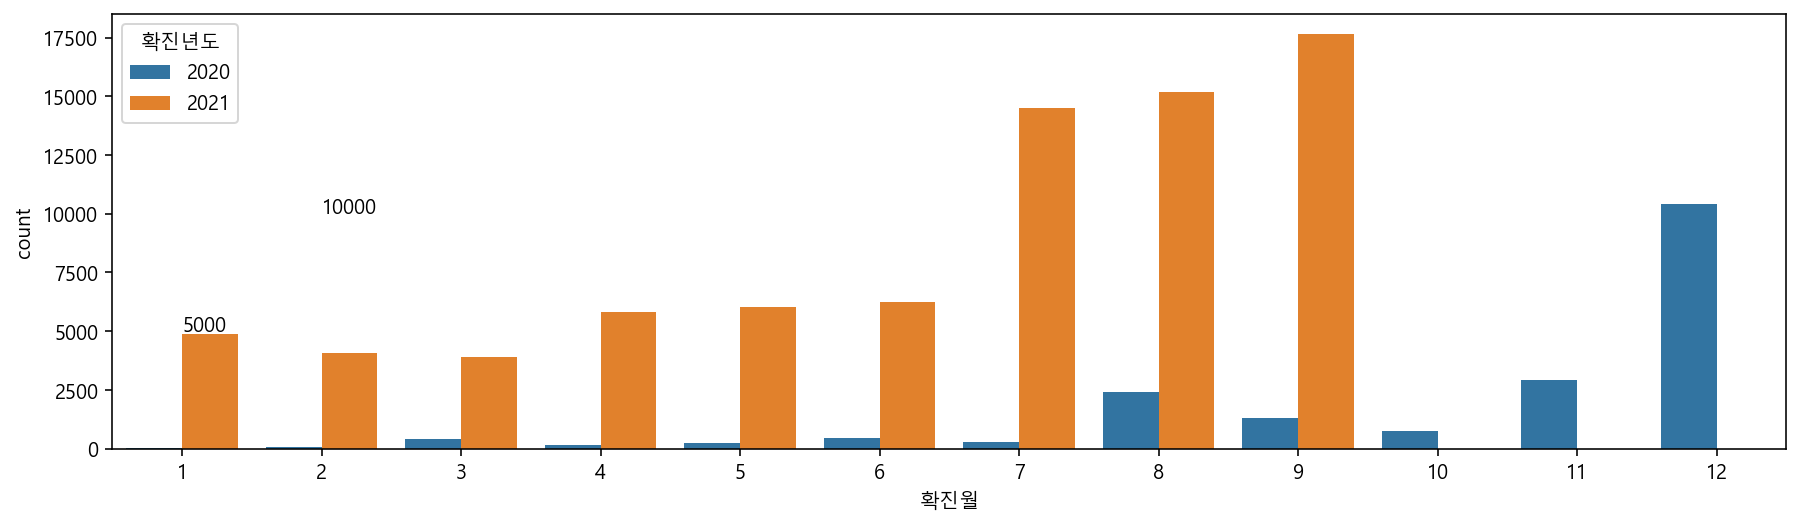

In [143]:
plt.figure(figsize=(15,4))
graph = sns.countplot(data=df, x='확진월',hue='확진년도')
graph.text(x=0, y=5000, s= 5000)
graph.text(x=1, y=10000, s= 10000)

#### 3.2.3. count(bar)plot에 값 표시하기

In [145]:
p = df.pivot_table(index='확진월',columns='확진년도', values='연번', aggfunc='count')
p

확진년도,2020,2021
확진월,,
1,7.0,4878.0
2,80.0,4060.0
3,391.0,3897.0
4,156.0,5803.0
5,229.0,6030.0
6,459.0,6258.0
7,281.0,14504.0
8,2415.0,15193.0
9,1306.0,17639.0


In [147]:
# Nan 값이 있으면 안됨
p[2021] = p[2021].fillna(0)

# int형으로 바꾸기
p[2020] = p[2020].astype(int)
p[2021] = p[2021].astype(int)

p

확진년도,2020,2021
확진월,,
1,7,4878
2,80,4060
3,391,3897
4,156,5803
5,229,6030
6,459,6258
7,281,14504
8,2415,15193
9,1306,17639


In [149]:
for i, val in p.iterrows():
    print(i,val[2020], val[2021])

1 7 4878
2 80 4060
3 391 3897
4 156 5803
5 229 6030
6 459 6258
7 281 14504
8 2415 15193
9 1306 17639
10 733 0
11 2904 0
12 10432 0


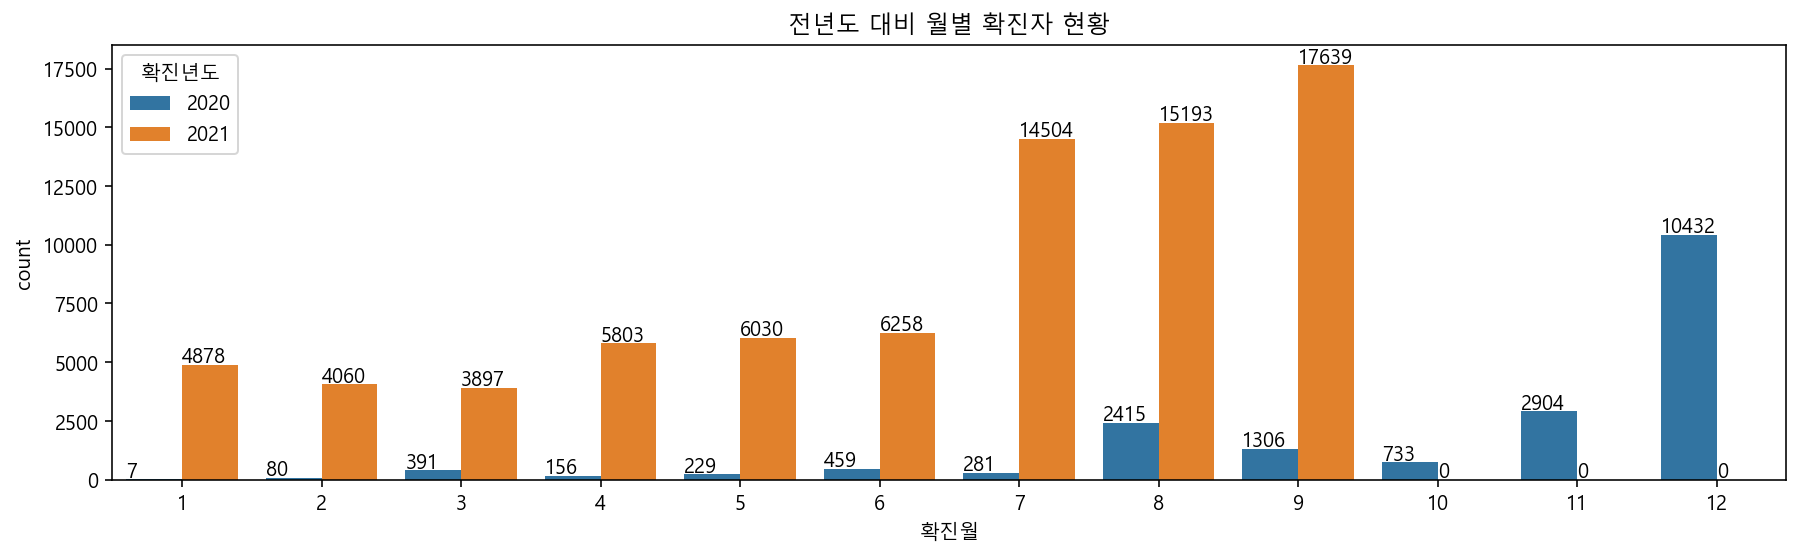

In [161]:
plt.figure(figsize=(15,4))
plt.title('전년도 대비 월별 확진자 현황')
graph = sns.countplot(data=df, x='확진월',hue='확진년도', order=p.index)

idx_no = 0
for i, val in p.iterrows():
    #print(i,val[2020], val[2021])
    graph.text(x=idx_no-0.4, y=val[2020]+100.0, s=val[2020])
    graph.text(x=idx_no, y=val[2021]+100.0, s=val[2021])
    idx_no +=1

### 3.3. 특정년도별 확진자 현황

In [172]:
# 2021년 확진자 보기
#df['확진일'].dt.year

df_2021 = df[df['확진년도']==2021]
df_2021 = df_2021.drop(columns=['확진년도'])
df_2021

,연번,확진일,지역,여행력,접촉력,상태,확진월
19353,19354,2021-01-01,성동구,NaN,감염경로 조사중,퇴원,1
19354,19355,2021-01-01,동작구,NaN,감염경로 조사중,퇴원,1
19355,19356,2021-01-01,금천구,NaN,기타 확진자 접촉,퇴원,1
19356,19357,2021-01-01,동작구,NaN,감염경로 조사중,퇴원,1
19357,19358,2021-01-01,관악구,NaN,감염경로 조사중,퇴원,1
...,...,...,...,...,...,...,...
97650,97651,2021-09-26,타시도,NaN,타시도 확진자 접촉,-,9
97651,97652,2021-09-26,광진구,NaN,감염경로 조사중,-,9
97652,97653,2021-09-26,영등포구,NaN,감염경로 조사중,-,9
97653,97654,2021-09-26,강북구,NaN,기타 확진자 접촉,-,9


In [174]:
df_2021 = df_2021.reset_index(drop=True)
df_2021

,연번,확진일,지역,여행력,접촉력,상태,확진월
0,19354,2021-01-01,성동구,NaN,감염경로 조사중,퇴원,1
1,19355,2021-01-01,동작구,NaN,감염경로 조사중,퇴원,1
2,19356,2021-01-01,금천구,NaN,기타 확진자 접촉,퇴원,1
3,19357,2021-01-01,동작구,NaN,감염경로 조사중,퇴원,1
4,19358,2021-01-01,관악구,NaN,감염경로 조사중,퇴원,1
...,...,...,...,...,...,...,...
78257,97651,2021-09-26,타시도,NaN,타시도 확진자 접촉,-,9
78258,97652,2021-09-26,광진구,NaN,감염경로 조사중,-,9
78259,97653,2021-09-26,영등포구,NaN,감염경로 조사중,-,9
78260,97654,2021-09-26,강북구,NaN,기타 확진자 접촉,-,9


#### 3.3.1.지역별 확진자 상태

<AxesSubplot:xlabel='지역', ylabel='count'>

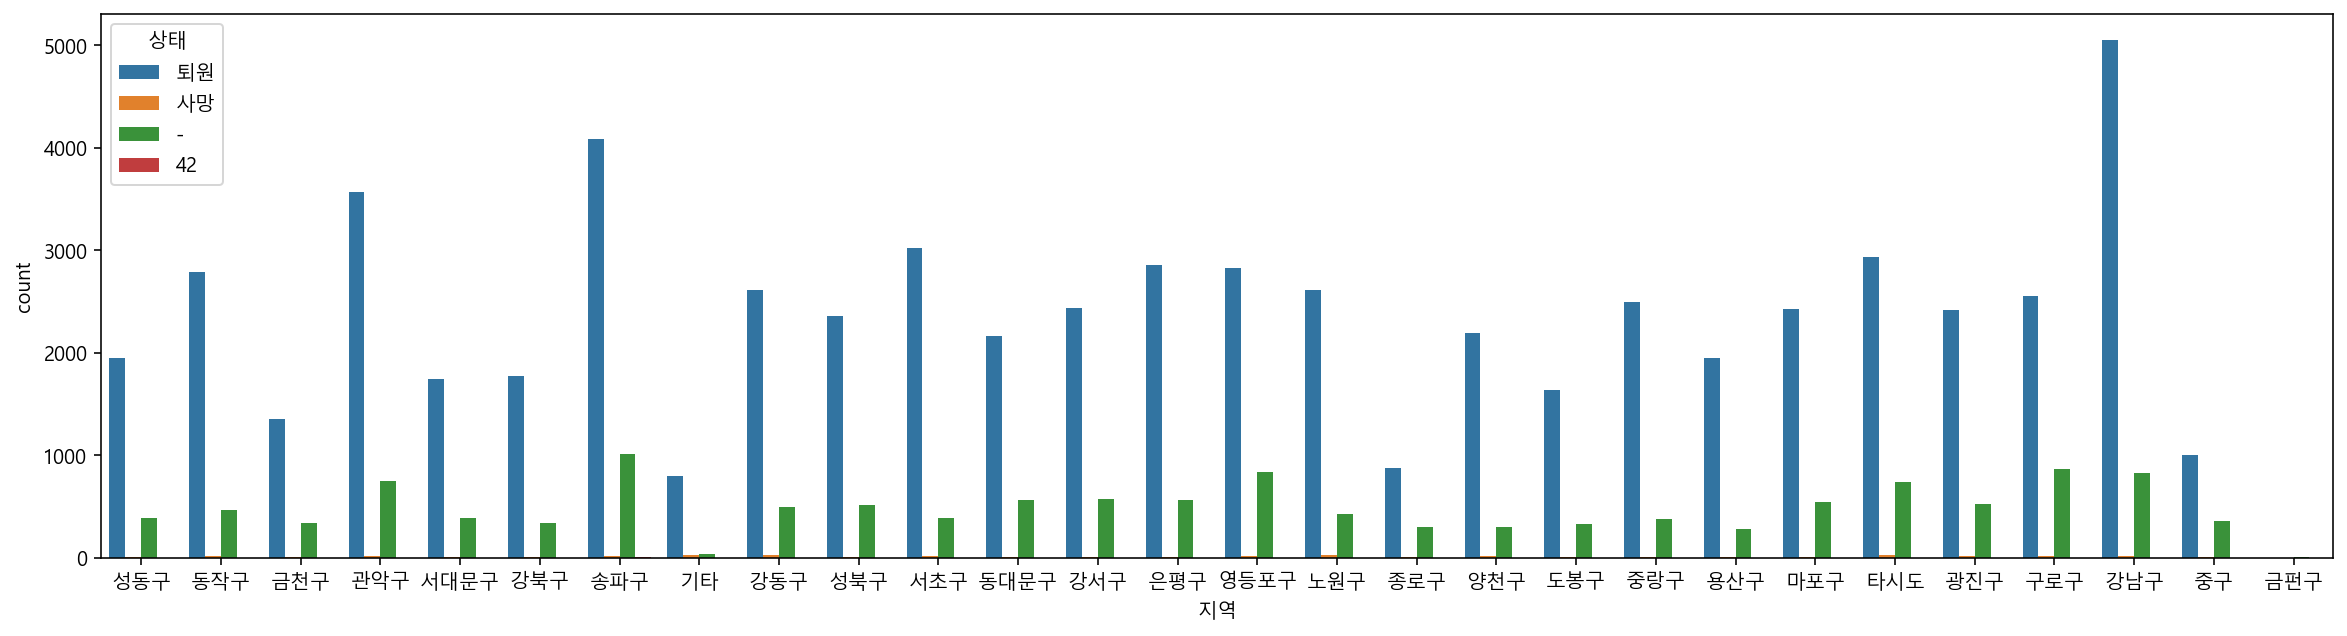

In [189]:
plt.figure(figsize=(20,5))
sns.countplot(data=df_2021, x='지역', hue='상태')

In [179]:
df_2021['지역'].value_counts()

강남구     5896
송파구     5111
관악구     4330
타시도     3698
영등포구    3685
은평구     3434
구로구     3431
서초구     3423
동작구     3258
강동구     3120
노원구     3053
강서구     3017
마포구     2969
광진구     2955
중랑구     2884
성북구     2872
동대문구    2732
양천구     2509
성동구     2345
용산구     2235
서대문구    2131
강북구     2116
도봉구     1968
금천구     1690
중구      1366
종로구     1170
기타       862
금펀구        1
타시도        1
Name: 지역, dtype: int64

In [186]:
#df_2021[df_2021['지역']=='금펀구']
#df_2021[df_2021['지역']=='타시도 ']
df_2021['지역'] = df_2021['지역'].str.replace('타시도 ','타시도')

<AxesSubplot:title={'center':'2021년 지역별 확진자 상태 현황'}, xlabel='지역', ylabel='count'>

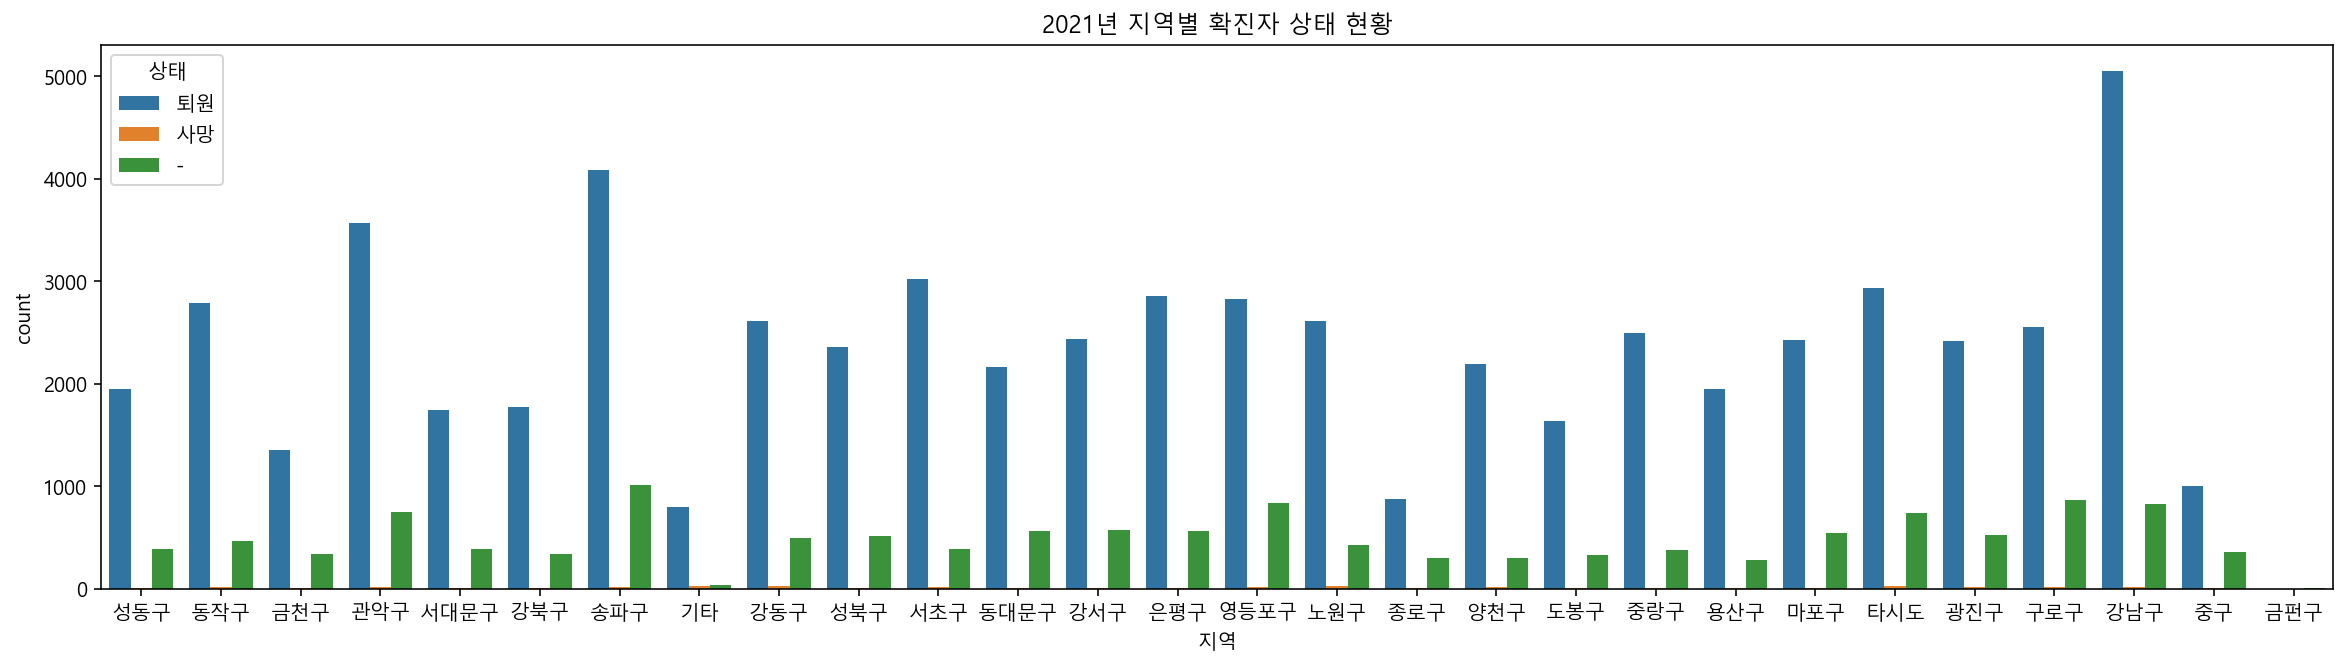

In [191]:
df2 = df_2021[(df_2021['상태']=='퇴원')|(df_2021['상태']=='사망')|(df_2021['상태']=='-')]

plt.figure(figsize=(20,5))
plt.title('2021년 지역별 확진자 상태 현황')
sns.countplot(data=df2, x='지역',hue='상태')

In [69]:
df.head()

,연번,확진일,지역,여행력,접촉력,상태,확진년도,확진월
0,1,2020-01-24,강서구,중국,해외유입,퇴원,2020,1
1,2,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1
2,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원,2020,1
3,4,2020-01-30,마포구,중국,해외유입,퇴원,2020,1
4,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원,2020,1


In [70]:
df_2021 = df[df['확진년도']==2021]
df_2021 = df_2021.drop(columns=['확진년도'])
df_2021 = df_2021.reset_index(drop=True)
df_2021

,연번,확진일,지역,여행력,접촉력,상태,확진월
0,19354,2021-01-01,성동구,NaN,감염경로 조사중,퇴원,1
1,19355,2021-01-01,동작구,NaN,감염경로 조사중,퇴원,1
2,19356,2021-01-01,금천구,NaN,기타 확진자 접촉,퇴원,1
3,19357,2021-01-01,동작구,NaN,감염경로 조사중,퇴원,1
4,19358,2021-01-01,관악구,NaN,감염경로 조사중,퇴원,1
...,...,...,...,...,...,...,...
78257,97651,2021-09-26,타시도,NaN,타시도 확진자 접촉,-,9
78258,97652,2021-09-26,광진구,NaN,감염경로 조사중,-,9
78259,97653,2021-09-26,영등포구,NaN,감염경로 조사중,-,9
78260,97654,2021-09-26,강북구,NaN,기타 확진자 접촉,-,9


In [72]:
df_2021.to_csv('data5/covid_seoul_2021.csv', index=False)

# 09.28 수업

In [73]:
df_2021 = pd.read_csv('data5/covid_seoul_2021.csv')
df_2021.head()

,연번,확진일,지역,여행력,접촉력,상태,확진월
0,19354,2021-01-01,성동구,NaN,감염경로 조사중,퇴원,1
1,19355,2021-01-01,동작구,NaN,감염경로 조사중,퇴원,1
2,19356,2021-01-01,금천구,NaN,기타 확진자 접촉,퇴원,1
3,19357,2021-01-01,동작구,NaN,감염경로 조사중,퇴원,1
4,19358,2021-01-01,관악구,NaN,감염경로 조사중,퇴원,1


In [74]:
# 지역 이름 공백 제거
df_2021['지역']=df_2021['지역'].str.replace(' ','')
df_2021['지역'].value_counts

<bound method IndexOpsMixin.value_counts of 0         성동구
1         동작구
2         금천구
3         동작구
4         관악구
         ... 
78257     타시도
78258     광진구
78259    영등포구
78260     강북구
78261     성북구
Name: 지역, Length: 78262, dtype: object>

In [75]:
# 지역 중 기타, 타시도, 금펀구 제거
df_2021_mod = df_2021.copy()
df_2021_mod = df_2021_mod[(df_2021_mod['지역'] != '기타')&(df_2021_mod['지역'] != '타시도')&(df_2021_mod['지역'] != '금펀구')]
df_2021_mod['지역'].value_counts()

강남구     5896
송파구     5111
관악구     4330
영등포구    3685
은평구     3434
구로구     3431
서초구     3423
동작구     3258
강동구     3120
노원구     3053
강서구     3017
마포구     2969
광진구     2955
중랑구     2884
성북구     2872
동대문구    2732
양천구     2509
성동구     2345
용산구     2235
서대문구    2131
강북구     2116
도봉구     1968
금천구     1690
중구      1366
종로구     1170
Name: 지역, dtype: int64

<AxesSubplot:xlabel='지역', ylabel='count'>

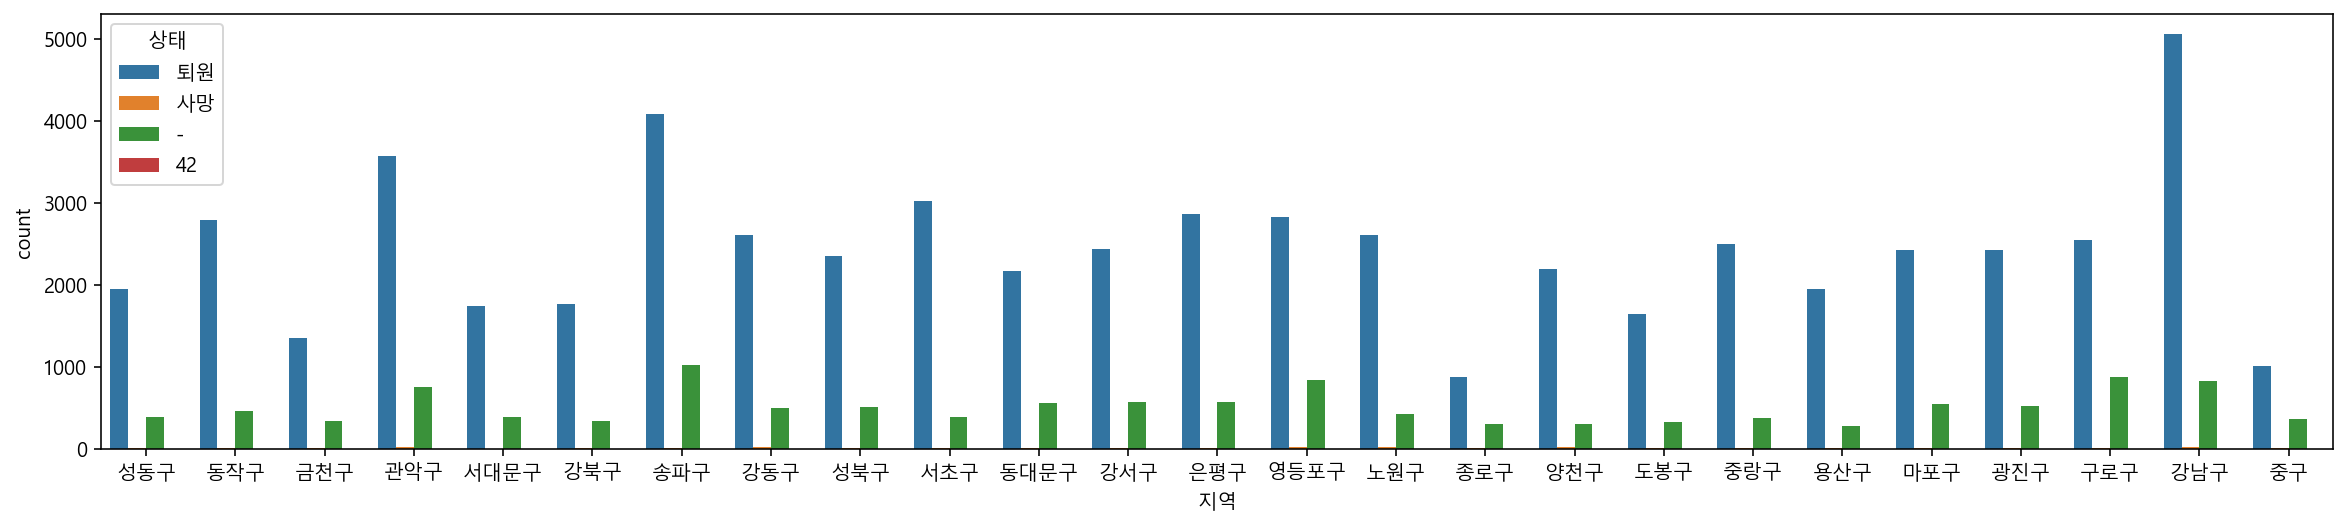

In [76]:


plt.figure(figsize=(20,4))
sns.countplot(data=df_2021_mod, x='지역',hue='상태')

In [77]:
# 상태가 42인 데이터 확인
df_2021_mod[df_2021_mod['상태']=='42']

,연번,확진일,지역,여행력,접촉력,상태,확진월
61057,80451,2021-09-01,송파구,NaN,송파구 소재 실내운동시설 관련(21.9.),42,9


<AxesSubplot:title={'center':'2021년 지역별 확진자 상태 현황'}, xlabel='지역', ylabel='count'>

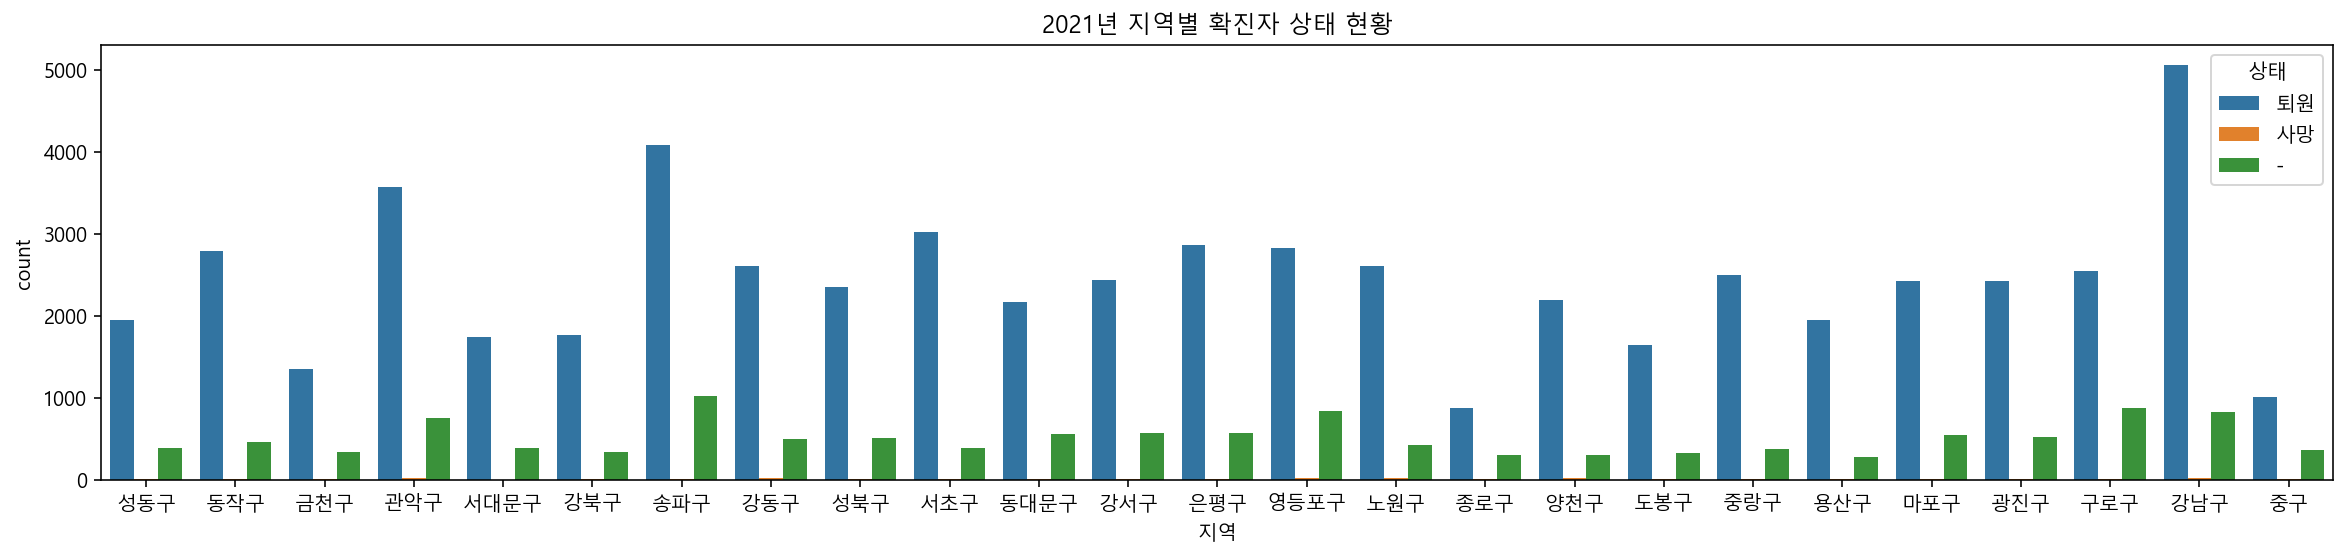

In [78]:
df_2021_mod = df_2021_mod[df_2021_mod['상태']!='42']
plt.figure(figsize=(20,4))
plt.title('2021년 지역별 확진자 상태 현황')
sns.countplot(data=df_2021_mod, x='지역',hue='상태')

In [81]:
p = df_2021_mod.pivot_table(index='지역',columns='상태', values='연번', aggfunc='count')
p

상태,-,사망,퇴원
지역,,,
강남구,828,16,5052
강동구,491,22,2607
강북구,339,9,1768
강서구,568,9,2440
관악구,750,17,3563
광진구,522,13,2420
구로구,869,12,2550
금천구,334,4,1352
노원구,424,21,2608


In [82]:
p = p[['퇴원','사망','-']]
p

상태,퇴원,사망,-
지역,,,
강남구,5052,16,828
강동구,2607,22,491
강북구,1768,9,339
강서구,2440,9,568
관악구,3563,17,750
광진구,2420,13,522
구로구,2550,12,869
금천구,1352,4,334
노원구,2608,21,424


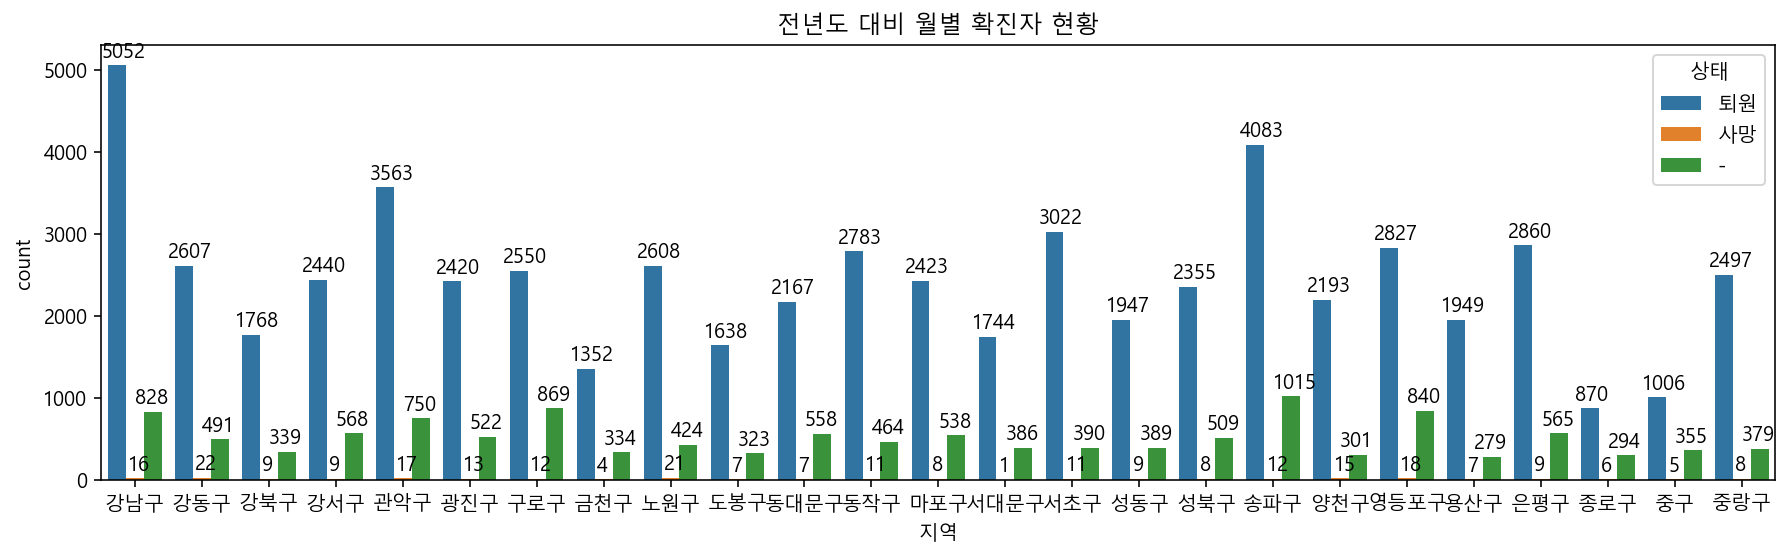

In [83]:
plt.figure(figsize=(15,4))
plt.title('전년도 대비 월별 확진자 현황')
graph = sns.countplot(data=df_2021_mod, x='지역',hue='상태', order=p.index)

idx_no = 0
for i, val in p.iterrows():
    #print(i,val['퇴원'], val['사망'])
    graph.text(x=idx_no-0.5, y=val['퇴원']+100.0, s=val['퇴원'])
    graph.text(x=idx_no-0.1, y=val['사망']+100.0, s=val['사망'])
    graph.text(x=idx_no, y=val['-']+100.0, s=val['-'])
    idx_no +=1

#### 3.3.2.월별 확진자/완치자/사망자

In [87]:
df1 = df_2021_mod.groupby('확진월')['연번'].count().to_frame()
df1 = df1.rename(columns={'연번':'확진자'})
df1.head()

,확진자
확진월,
1,4272
2,3645
3,3654
4,5484
5,5781


In [88]:
df_2021_mod['상태'].value_counts()

퇴원    60724
-     12710
사망      265
Name: 상태, dtype: int64

In [90]:
# 월별 완치자, 사망자 수
#df_2021_mod['상태'] != '-'
df2 = df_2021_mod[(df_2021_mod['상태'] == '퇴원')|(df_2021_mod['상태'] == '사망')]
df2['상태'].value_counts()

퇴원    60724
사망      265
Name: 상태, dtype: int64

In [92]:
df2 = df2.pivot_table(index='확진월', columns='상태', values='연번', aggfunc='count')
df2.head()

상태,사망,퇴원
확진월,,
1,52,4220
2,37,3608
3,17,3637
4,22,5462
5,36,5745


In [94]:
df3 = pd.merge(df1, df2, how='left', on='확진월')
df3 = df3.rename(columns={'사망':'사망자', '퇴원':'완치자'})
df3

,확진자,사망자,완치자
확진월,,,
1,4272,52,4220
2,3645,37,3608
3,3654,17,3637
4,5484,22,5462
5,5781,36,5745
6,5917,21,5890
7,13823,31,13507
8,14389,32,12825
9,16734,17,5830


- 월별 완치자/사망자

In [99]:
df3['사망비율'] = round(df3['사망자']/df3['확진자']*100, 1)
df3['완치비율'] = round(df3['완치자']/df3['확진자']*100, 1)
df3

,확진자,사망자,완치자,사망비율,완치비율
확진월,,,,,
1,4272,52,4220,1.2,98.8
2,3645,37,3608,1.0,99.0
3,3654,17,3637,0.5,99.5
4,5484,22,5462,0.4,99.6
5,5781,36,5745,0.6,99.4
6,5917,21,5890,0.4,99.5
7,13823,31,13507,0.2,97.7
8,14389,32,12825,0.2,89.1
9,16734,17,5830,0.1,34.8


<AxesSubplot:title={'center':'2021년 월별 사망자 비율'}, xlabel='확진월'>

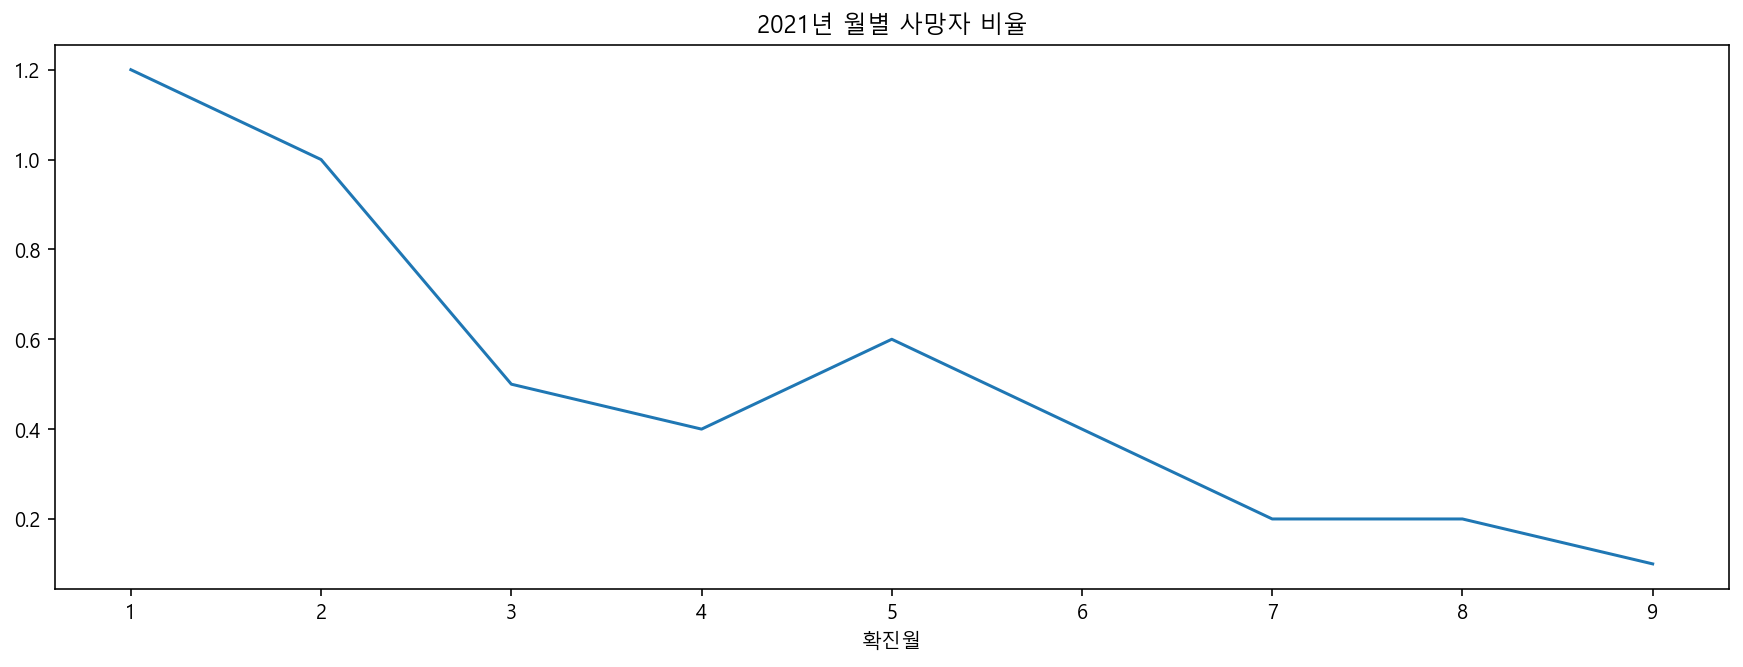

In [100]:
df3['사망비율'].plot(title='2021년 월별 사망자 비율')

# 그래프와 표를 보고 가설을 세우고, 뒷받침할 신문기사나 새로운 그래프를 만들면 됨. ex) 나이대별 확진자 구해서 사망률 원인분석

<AxesSubplot:title={'center':'2021년 월별 완치자 비율'}, xlabel='확진월'>

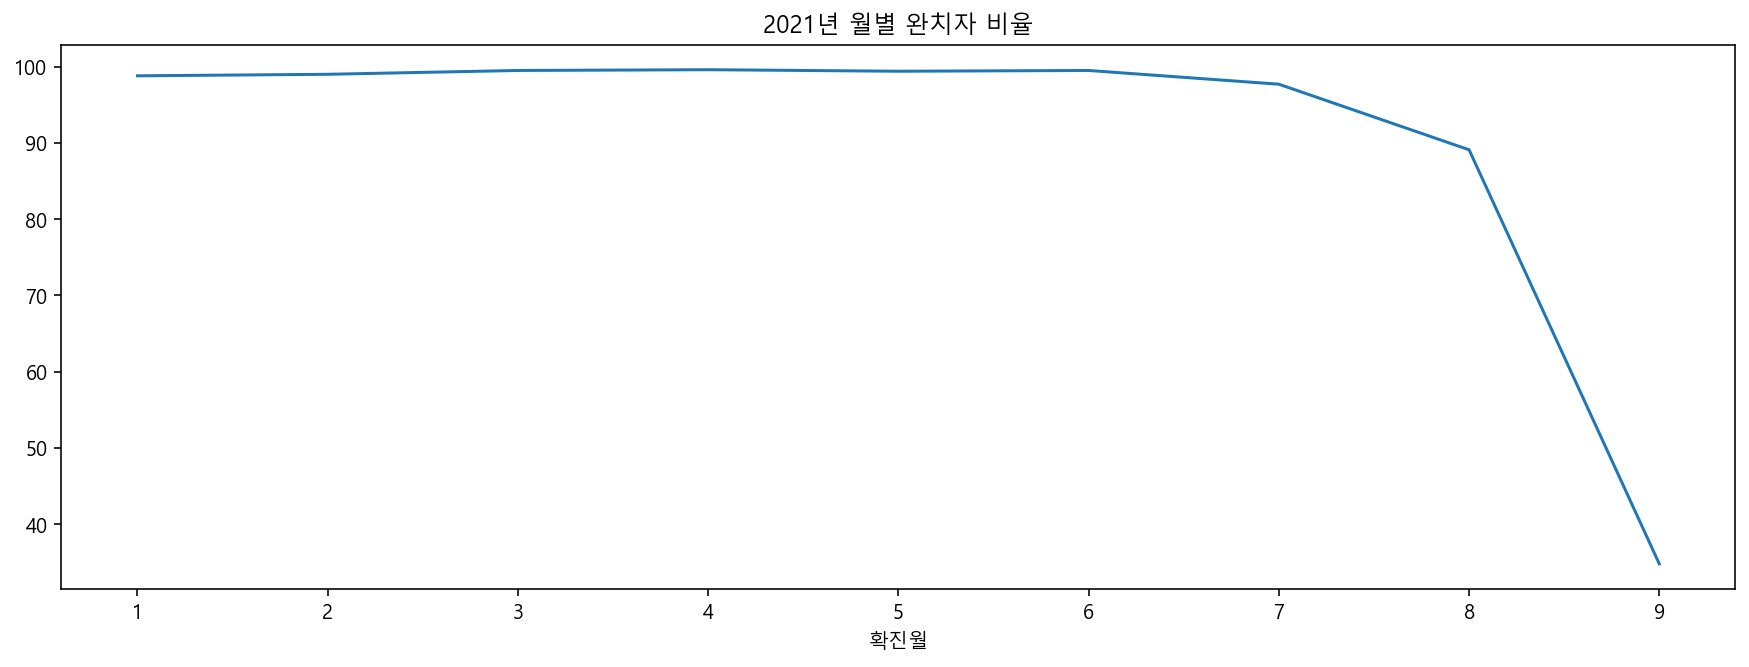

In [101]:
df3['완치비율'].plot(title='2021년 월별 완치자 비율')

<AxesSubplot:title={'center':'2021년 월별 확진자 현황'}, xlabel='확진월'>

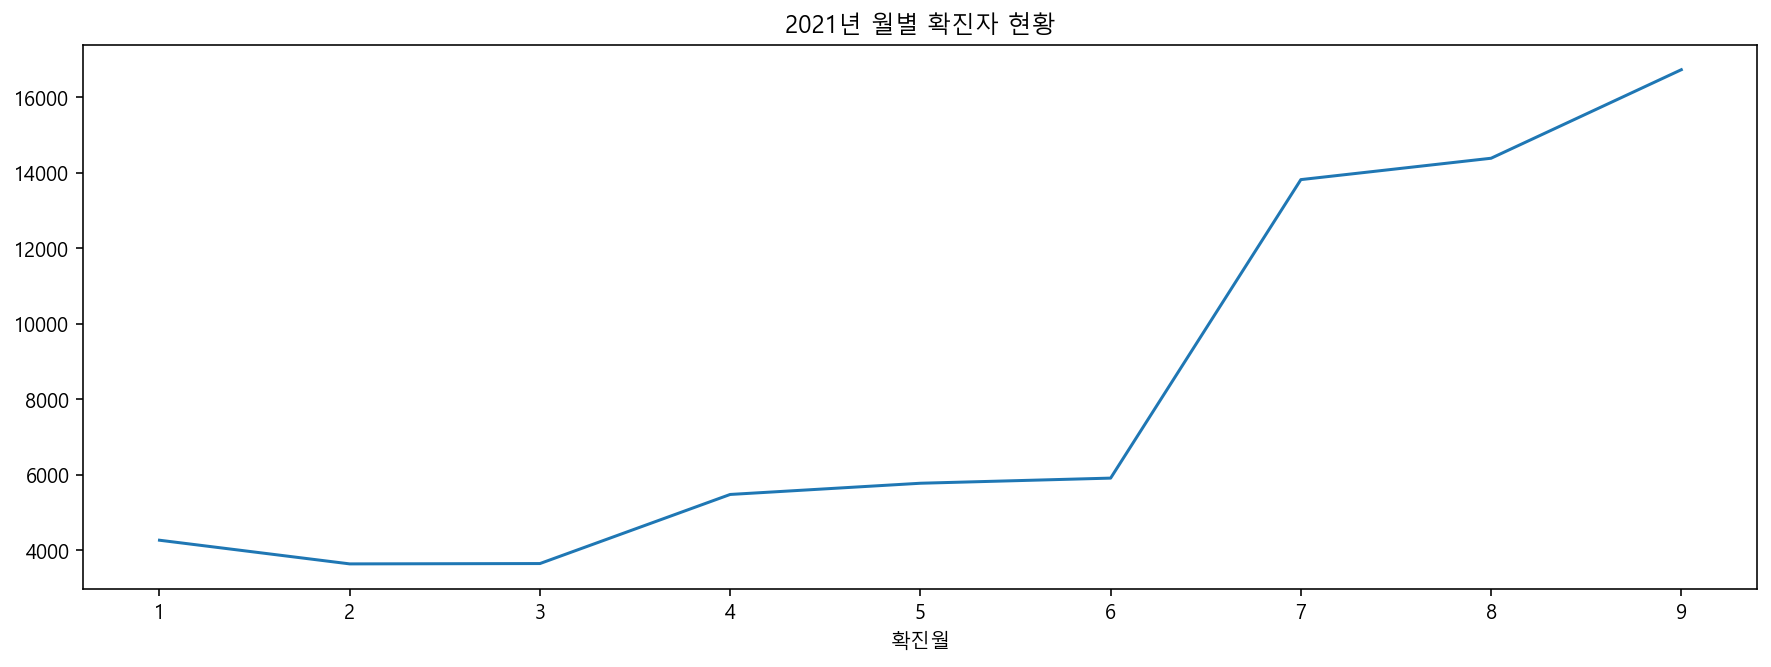

In [102]:
df3['확진자'].plot(title='2021년 월별 확진자 현황')

<AxesSubplot:title={'center':'2021년 확진자 상태 현황'}, xlabel='확진월'>

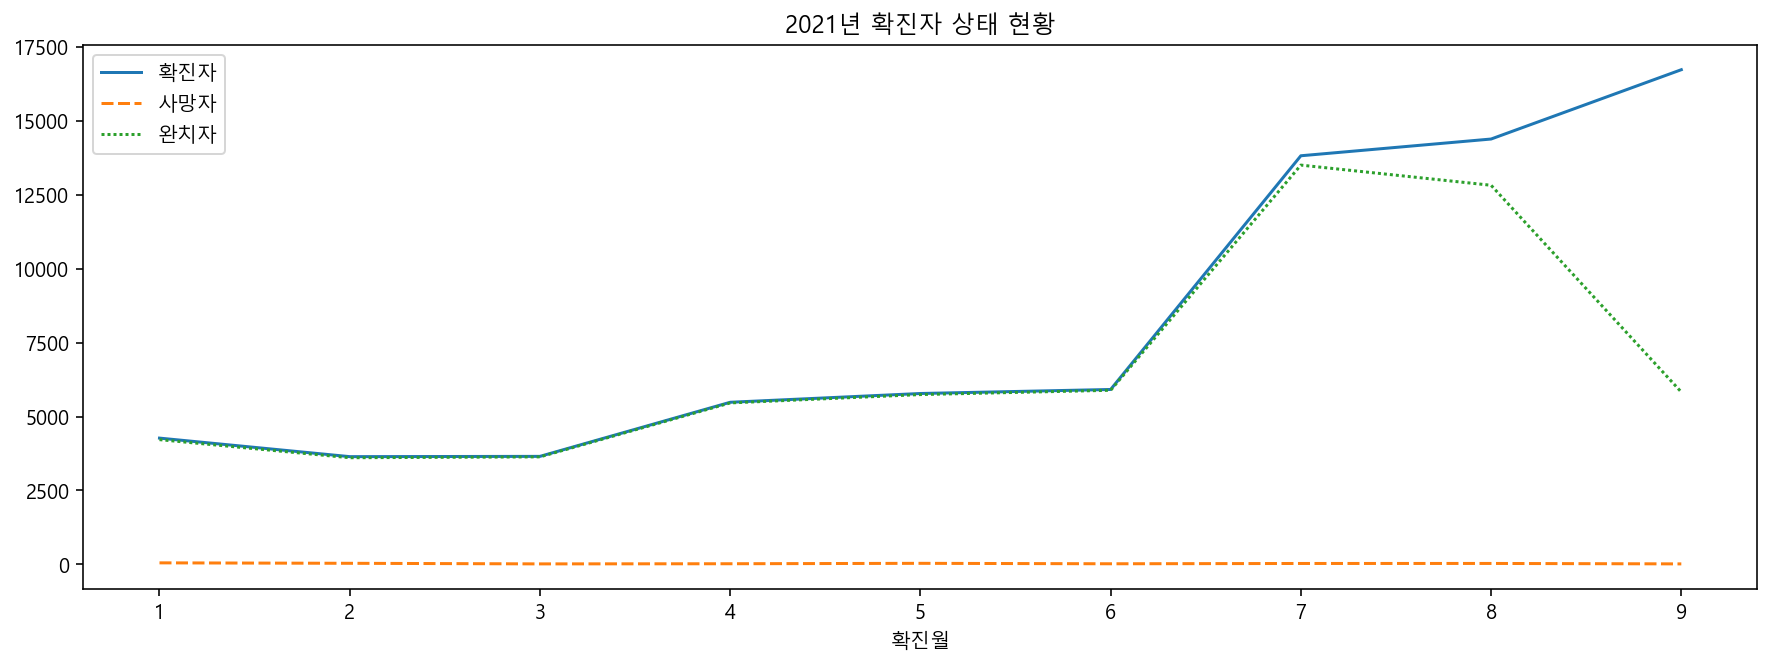

In [104]:
plt.title('2021년 확진자 상태 현황')
sns.lineplot(data=df3[['확진자', '사망자','완치자']])

<AxesSubplot:title={'center':'2021년 확진자 대비 상태 현황'}, xlabel='확진월'>

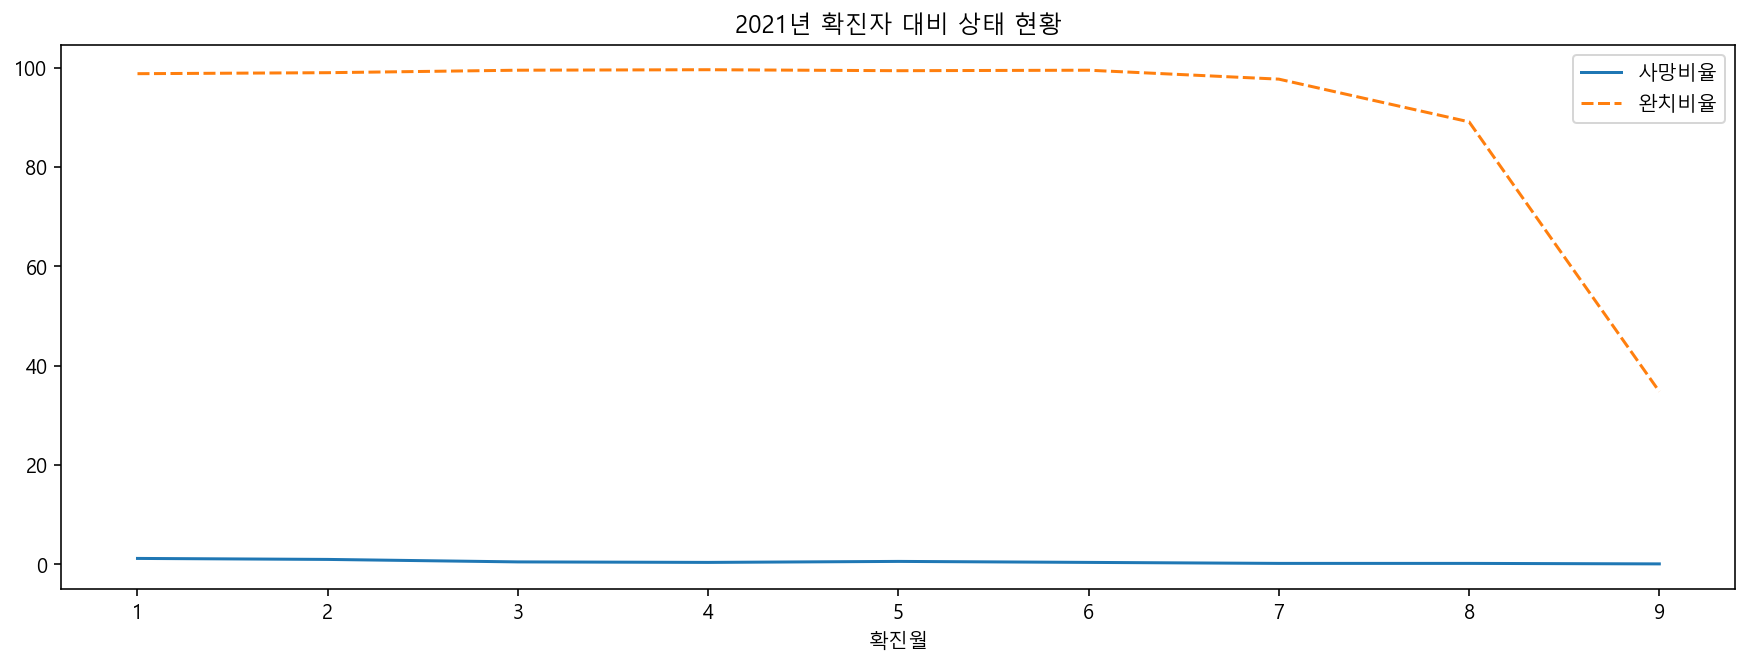

In [105]:
plt.title('2021년 확진자 대비 상태 현황')
sns.lineplot(data=df3[['사망비율', '완치비율']])

### 3.4. 특정날짜 확진자 현황

#### 3.4.1. 최근날짜 확진자 현황

In [116]:
df_2021_mod

,연번,확진일,지역,여행력,접촉력,상태,확진월
0,19354,2021-01-01,성동구,NaN,감염경로 조사중,퇴원,1
1,19355,2021-01-01,동작구,NaN,감염경로 조사중,퇴원,1
2,19356,2021-01-01,금천구,NaN,기타 확진자 접촉,퇴원,1
3,19357,2021-01-01,동작구,NaN,감염경로 조사중,퇴원,1
4,19358,2021-01-01,관악구,NaN,감염경로 조사중,퇴원,1
...,...,...,...,...,...,...,...
78256,97650,2021-09-26,동작구,NaN,감염경로 조사중,-,9
78258,97652,2021-09-26,광진구,NaN,감염경로 조사중,-,9
78259,97653,2021-09-26,영등포구,NaN,감염경로 조사중,-,9
78260,97654,2021-09-26,강북구,NaN,기타 확진자 접촉,-,9


In [114]:
max(df_2021_mod['확진일'])
df_last = df_2021_mod[df_2021_mod['확진일']==max(df_2021_mod['확진일'])]
df_last = df_last.reset_index(drop=True)
df_last

,연번,확진일,지역,여행력,접촉력,상태,확진월
0,96878,2021-09-26,동작구,NaN,감염경로 조사중,-,9
1,96879,2021-09-26,동작구,NaN,기타 확진자 접촉,-,9
2,96880,2021-09-26,구로구,NaN,감염경로 조사중,-,9
3,96881,2021-09-26,구로구,NaN,감염경로 조사중,-,9
4,96882,2021-09-26,구로구,NaN,기타 확진자 접촉,-,9
...,...,...,...,...,...,...,...
740,97650,2021-09-26,동작구,NaN,감염경로 조사중,-,9
741,97652,2021-09-26,광진구,NaN,감염경로 조사중,-,9
742,97653,2021-09-26,영등포구,NaN,감염경로 조사중,-,9
743,97654,2021-09-26,강북구,NaN,기타 확진자 접촉,-,9


In [127]:
df_last_mod = df_last.groupby('지역')['연번'].count().to_frame()
df_last_mod.rename(columns={'연번':'확진자'}, inplace=True)  # inplace : 바로 적용 >> 신중하게
df_last_mod

,확진자
지역,
강남구,43
강동구,17
강북구,27
강서구,29
관악구,37
광진구,37
구로구,72
금천구,18
노원구,25


In [137]:
df_last_mod = df_last_mod.reset_index()
df_last_mod

,지역,확진자
0,강남구,43
1,강동구,17
2,강북구,27
3,강서구,29
4,관악구,37
5,광진구,37
6,구로구,72
7,금천구,18
8,노원구,25
9,도봉구,25


<AxesSubplot:title={'center':'2021-09-26 확진자 현황'}, xlabel='지역'>

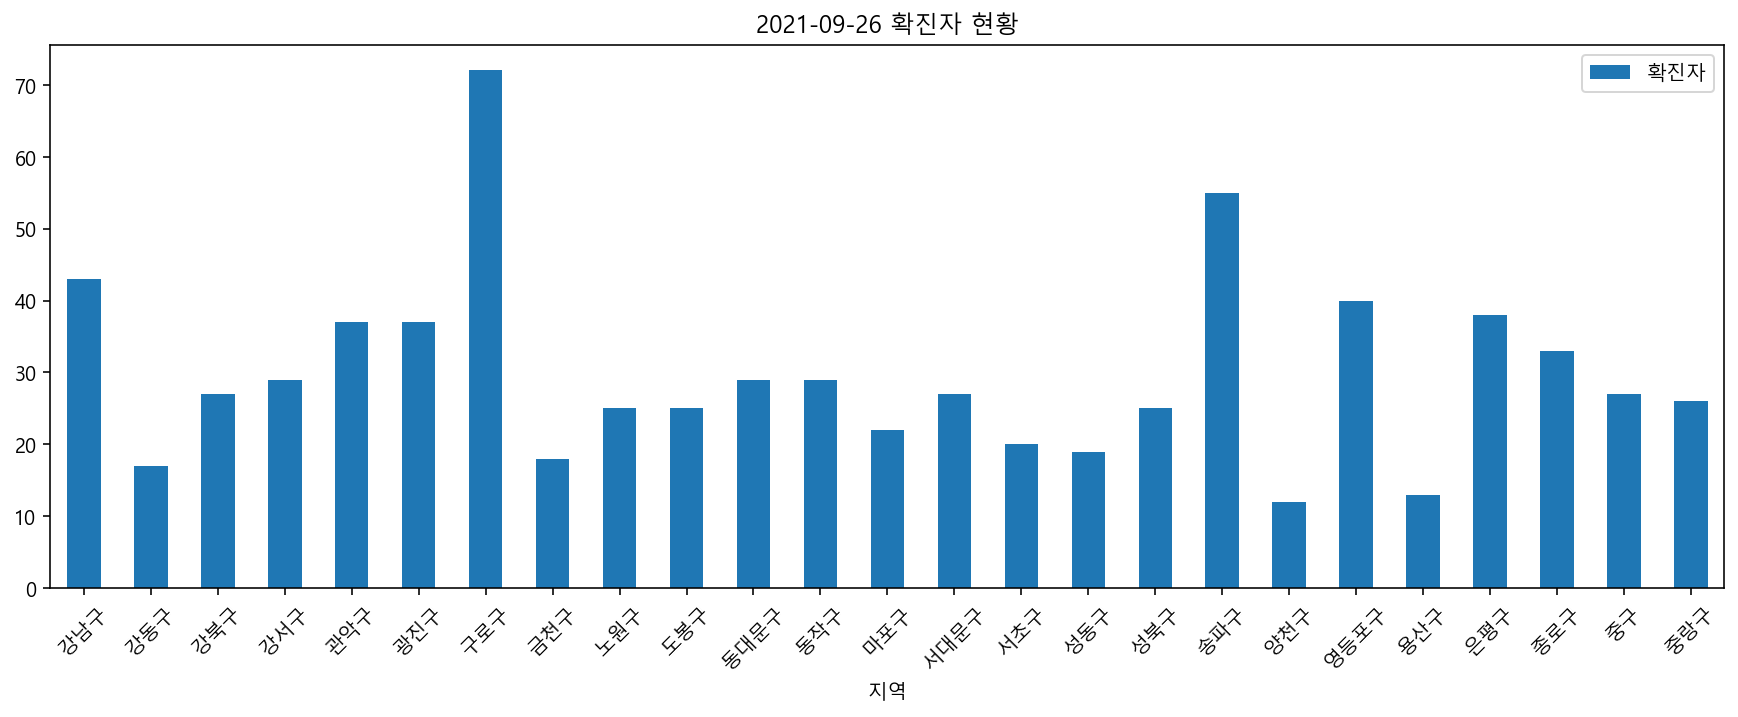

In [129]:
df_last_mod.plot(kind='bar', title='2021-09-26 확진자 현황', rot=45)

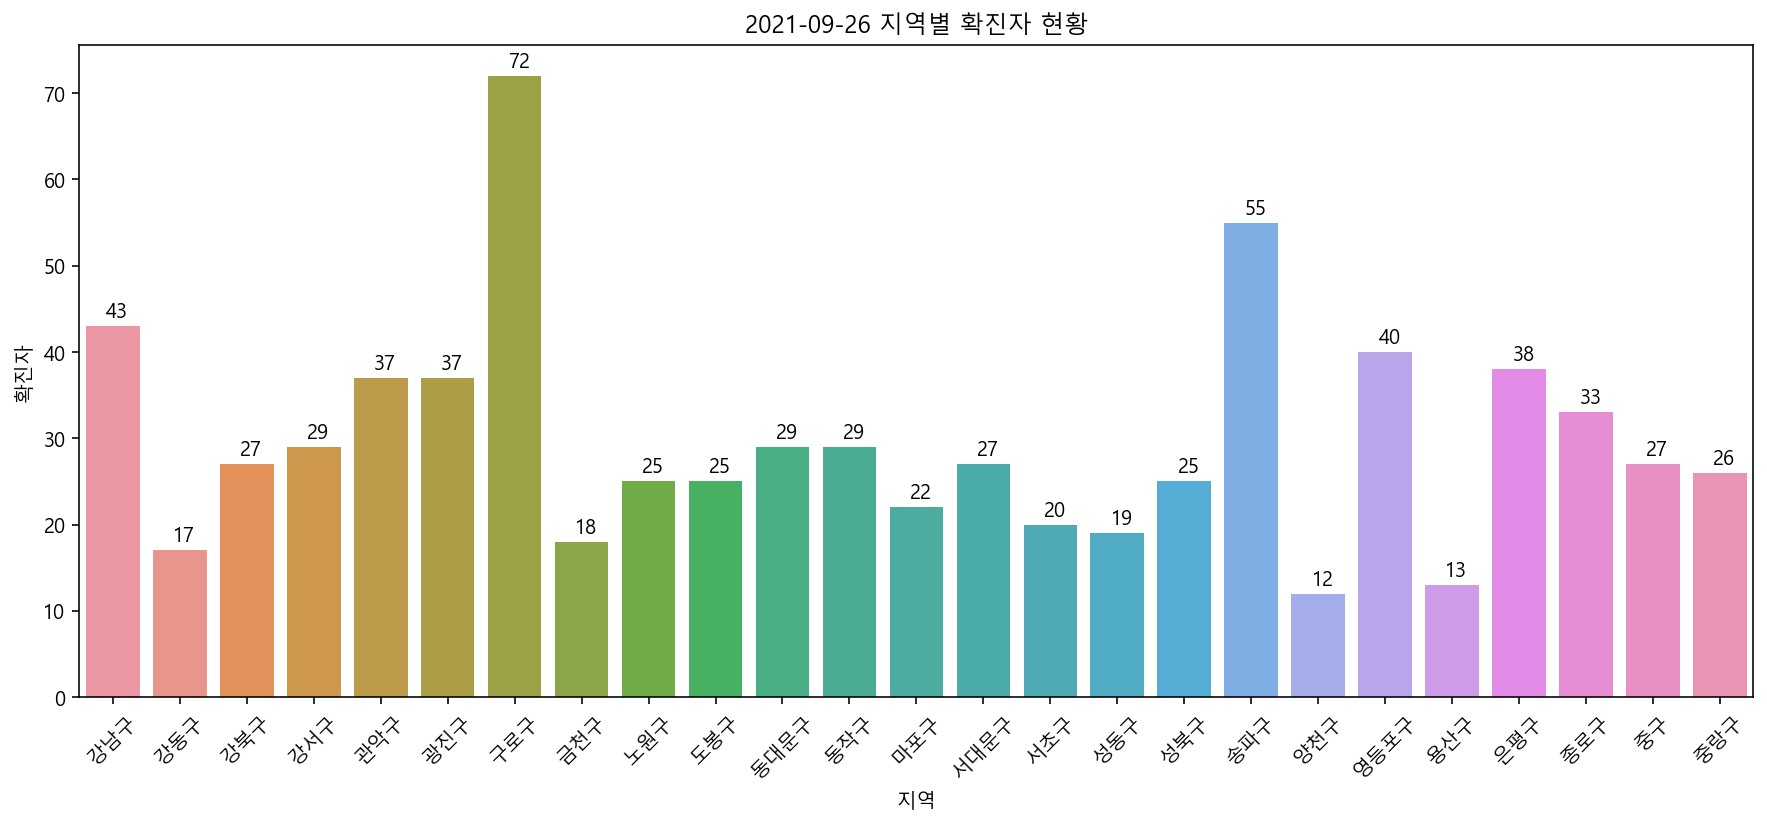

In [139]:
plt.figure(figsize=(15,6))
plt.title('2021-09-26 지역별 확진자 현황')
plt.xticks(rotation=45)

graph = sns.barplot(data=df_last_mod, x='지역', y='확진자')

for i in df_last_mod.index:
    graph.text(x = i-0.1, y = df_last_mod.loc[i,'확진자']+1.0, s = df_last_mod.loc[i,'확진자'])

#### 3.4.2. 지역별 확진자 데이터에 위도, 경도 추가하기

- 지역구별 위도, 경도

In [140]:
df_last['지역'].unique()


array(['동작구', '구로구', '광진구', '중랑구', '도봉구', '용산구', '성동구', '마포구', '관악구',
       '은평구', '노원구', '강남구', '중구', '강동구', '강북구', '동대문구', '양천구', '송파구',
       '서대문구', '종로구', '성북구', '서초구', '강서구', '금천구', '영등포구'], dtype=object)

In [141]:
seoul_location = {'용산구':[37.532725708342625, 126.99009654166805], 
                    '동작구':[37.512599986427105, 126.93985334166736], 
                    '서초구':[37.48369317044054, 127.03260735410082], 
                    '중랑구': [37.60673847109203, 127.09261326865725], 
                    '은평구':[37.60664687910709, 126.92868120278875], 
                    '도봉구': [37.67057554587662, 127.0477246665721], 
                    '동대문구': [37.574577041708636, 127.03973196865621], 
                    '성동구': [37.56317901160371, 127.03675746283356], 
                    '광진구': [37.5387204415613, 127.08245229933925],
                    '마포구': [37.56950151570846, 126.90237934046458], 
                    '강동구':[37.53308007100858, 127.12462220515263], 
                    '강북구':[37.64464362390851, 127.02605843165135], 
                    '강남구':[37.523500252352285, 127.04736005601958], 
                    '양천구': [37.52147347890292, 126.86444024766514], 
                    '서대문구':[37.583452699220764, 126.93645119367744], 
                    '관악구': [37.481083532872205, 126.95396065745834], 
                    '구로구':[37.49566606185861, 126.88774638584452],
                    '송파구':[37.514628832358575, 127.10608715516081], 
                    '금천구': [37.461192383899636, 126.89593911484947], 
                    '성북구':[37.59406273320025, 127.01816200516214], 
                    '강서구': [37.55444758595141, 126.84965478261033], 
                    '중구':[37.56928046197, 126.99843681450469], 
                    '노원구':[37.65622904201775, 127.05671259262743], 
                    '영등포구':[37.536689927111276, 126.89762928418646], 
                    '종로구':[37.58100401505884, 126.98073982679308]}


In [145]:
df_last_mod.head()

,지역,확진자
0,강남구,43
1,강동구,17
2,강북구,27
3,강서구,29
4,관악구,37


In [150]:
df_location = pd.DataFrame(seoul_location)
df_location = df_location.T
df_location = df_location.reset_index()
df_location = df_location.rename(columns={'index':'지역', 0:'위도', 1:'경도'})
df_location.head(1)

,지역,위도,경도
0,용산구,37.532726,126.990097


In [154]:
df_last_mod = pd.merge(df_last_mod, df_location, how='left', on='지역')
df_last_mod

,지역,확진자,위도,경도
0,강남구,43,37.523500,127.047360
1,강동구,17,37.533080,127.124622
2,강북구,27,37.644644,127.026058
3,강서구,29,37.554448,126.849655
4,관악구,37,37.481084,126.953961
5,광진구,37,37.538720,127.082452
6,구로구,72,37.495666,126.887746
7,금천구,18,37.461192,126.895939
8,노원구,25,37.656229,127.056713
9,도봉구,25,37.670576,127.047725


#### 3.4.3. Folium 으로 지도 활용하기
- https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
- !pip install folium

In [155]:
!pip install folium

In [156]:
import folium

m = folium.Map()
m

- 위도, 경도를 이용하여 지도에 확진자 현황 표시하기

In [164]:
lat = df_last_mod['위도'].mean()
long = df_last_mod['경도'].mean()
m = folium.Map(location=[lat, long], zoom_start=11)
m

In [175]:
# 강남구 데이터 찍어보기
m = folium.Map(location=[lat, long], zoom_start=12)

folium.Marker(
    [37.5235, 127.04736], popup="<i>강남구</i>", tooltip='강남구'
).add_to(m)
m

In [165]:
df_last_mod.iloc[0]

지역           강남구
확진자           43
위도       37.5235
경도     127.04736
Name: 0, dtype: object

In [176]:
m.save('data5/covid_seoul_map.html')

- 지역별 확진자 현황 지도에 표시

In [177]:
df_last_mod

,지역,확진자,위도,경도
0,강남구,43,37.523500,127.047360
1,강동구,17,37.533080,127.124622
2,강북구,27,37.644644,127.026058
3,강서구,29,37.554448,126.849655
4,관악구,37,37.481084,126.953961
5,광진구,37,37.538720,127.082452
6,구로구,72,37.495666,126.887746
7,금천구,18,37.461192,126.895939
8,노원구,25,37.656229,127.056713
9,도봉구,25,37.670576,127.047725


In [189]:
# 기본 지도 생성
lat = df_last_mod['위도'].mean()
long = df_last_mod['경도'].mean()
m = folium.Map(location=[lat, long], zoom_start=11)

# 마커 생성
for i in df_last_mod.index :
    #print(df_last_mod.loc[i,'지역'], df_last_mod.loc[i,'위도'])
    lat = df_last_mod.loc[i,'위도']
    long = df_last_mod.loc[i,'경도']
    tooltip = df_last_mod.loc[i,'지역']+':'+str(df_last_mod.loc[i,'확진자'])
    #folium.Marker([lat, long], tooltip=tooltip).add_to(m)
    folium.Marker([lat, long], tooltip=tooltip, icon=folium.Icon(color='red')).add_to(m)
    
m.save('data5/covid_seoul_map.html')
m

- CircleMarker를 이용하여 표시

In [199]:
# 기본 지도 생성
lat = df_last_mod['위도'].mean()
long = df_last_mod['경도'].mean()
m = folium.Map(location=[lat, long], zoom_start=11)

# 마커 생성
for i in df_last_mod.index :
    #print(df_last_mod.loc[i,'지역'], df_last_mod.loc[i,'위도'])
    lat = df_last_mod.loc[i,'위도']
    long = df_last_mod.loc[i,'경도']
    tooltip = df_last_mod.loc[i,'지역']+':'+str(df_last_mod.loc[i,'확진자'])
    #folium.Marker([lat, long], tooltip=tooltip).add_to(m)
    folium.CircleMarker([lat, long], tooltip=tooltip, radius=int(df_last_mod.loc[i,'확진자'])/2, color='blue', fill_color='blue', fill=True).add_to(m)
    
m.save('data5/covid_seoul_CircleMap.html')
m

In [208]:
lat = df_last_mod['위도'].mean()
long = df_last_mod['경도'].mean()
m = folium.Map(location=[lat, long], zoom_start=11, tiles="CartoDB positron")

# 마커 생성
for i in df_last_mod.index :
    #print(df_last_mod.loc[i,'지역'], df_last_mod.loc[i,'위도'])
    lat = df_last_mod.loc[i,'위도']
    long = df_last_mod.loc[i,'경도']
    tooltip = df_last_mod.loc[i,'지역']+':'+str(df_last_mod.loc[i,'확진자'])
    #folium.Marker([lat, long], tooltip=tooltip).add_to(m)
    folium.CircleMarker([lat, long], tooltip=tooltip, radius=int(df_last_mod.loc[i,'확진자'])/2, color='black',fill_color='black', fill=True).add_to(m)
    
m.save('data5/covid_seoul_CircleMap.html')
m